# Comparative Analysis of Displaced and Host Community Children in Bangladesh (2023)

## **Datathon Context**

This project is part of the **OECD and UNHCR Datathon 2025**, an international initiative that leverages data-driven solutions to tackle global humanitarian challenges. The focus is on deriving actionable insights from the **UNHCR Microdata Library**, with a particular emphasis on **displaced and host community children**.

## **Challenge Theme**

The challenge is designed to explore the **disparities and commonalities** between displaced (refugee) and host community children to:
- Compare **educational attainment**, **healthcare access**, and **living conditions**.
- Identify shared challenges and potential opportunities for **inclusive, integrated policy-making**.
- Contribute to regional and international comparisons where applicable.

## **Project Focus**

### **Objective**:
Conduct a **comparative analysis** of displaced and host community children in **Bangladesh** using two datasets from **2023**—one representing **refugee** children and the other **host community** children.

### **Key Areas of Analysis**:
- **Education**: School attendance, literacy levels, and access to learning resources.
- **Healthcare**: Immunization rates, access to health services, and prevalent health issues.
- **Living Conditions**: Shelter types, access to clean water, sanitation, and basic services.

##  **Methodology**

This analysis will follow a step-by-step **Explanatory Data Analysis** approach using **Python**, broken down as follows:

1. **Data Loading & Initial Overview**  
   Understanding the structure and content of each dataset.

2. **Data Cleaning & Preparation**  
   Standardizing and preprocessing the data to ensure consistency and comparability.

3. **Variable Mapping & Selection**  
   Identifying comparable indicators across the datasets.

4. **Descriptive & Comparative Analysis**  
   Visualizing and summarizing the differences and similarities between the two groups.

5. **Insights & Recommendations**  
   Highlighting disparities, shared challenges, and actionable findings for policy makers.

## **Datasets**

- **UNHCR_BGD_2023_msnahost_datai_anon_v.2.1.csv**  
- **UNHCR_BGD_2023_msnaref_datai_anon_v.2.1.csv**  
Source: [UNHCR Microdata Library](https://microdata.unhcr.org)

## ✨ **Expected Outcome** ✨

By identifying patterns, trends, and gaps in the lives of both displaced and host community children, this project will contribute to **evidence-based policy recommendations** that foster **social inclusion** and improve **service delivery** for all children—regardless of their status.

---

*Prepared by: Glorius Musyawa and Kevin Walter | Team: ESSENTIAL DATA | OECD & UNHCR Datathon 2025*



In [52]:
#Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import Patch



**Data Loading & Initial Overview**  
   Understanding the structure and content of each dataset.

In [2]:
Refugee_df = pd.read_csv("UNHCR_BGD_2023_msnaref_datai_anon_v.2.1.csv")
Host_df = pd.read_csv("UNHCR_BGD_2023_msnahost_datai_anon_v.2.1.csv")

In [3]:
Refugee_df.head(5)

,pseudo_parent_id,pseudo_id,ind_age,ind_gender,ind_relationship_hoh,hh_marital,currently_working_contributin_1,direct_proxy,caregiver_available,proxy_resp_gender,...,health_tmnt_needed_gbv_services,health_tmnt_needed_mhpss_serv_1,health_tmnt_needed_vaccinatio_1,health_tmnt_needed_dental_ser_1,health_tmnt_needed_family_pla_1,health_tmnt_needed_oth,health_tmnt_needed_dont_know,health_tmnt_needed_decline_an_1,health_received_healthcare,weights
0,1,9881,18_35,female,child,not_married,no,yes_interpreter,NaN,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,1.432766
1,1,15746,36_59,female,spouse,married,no,yes_direct_itw,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,1.432766
2,1,12090,5_11,male,child,NaN,no,yes_interpreter,no,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432766
3,1,152,18_35,male,child,not_married,yes,yes_interpreter,NaN,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432766
4,1,7503,36_59,male,head_hh,married,yes,yes_interpreter,NaN,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432766


In [4]:
Refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18117 entries, 0 to 18116
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pseudo_parent_id                  18117 non-null  int64  
 1   pseudo_id                         18117 non-null  int64  
 2   ind_age                           18117 non-null  object 
 3   ind_gender                        18117 non-null  object 
 4   ind_relationship_hoh              18117 non-null  object 
 5   hh_marital                        12327 non-null  object 
 6   currently_working_contributin_1   14347 non-null  object 
 7   direct_proxy                      15255 non-null  object 
 8   caregiver_available               9089 non-null   object 
 9   proxy_resp_gender                 3988 non-null   object 
 10  proxy_resp_age                    3985 non-null   float64
 11  difficulty_seeing                 15255 non-null  object 
 12  diff

In [5]:
#Checking for the ages available in the dataset since the main focus of the analysis is children
Refugee_df['ind_age'].unique()

array(['18_35', '36_59', '5_11', '0_4', '12_17', '60+'], dtype=object)

### Filtering the Dataset for Children Only

To align with the Datathon objective - **analyzing displaced and host community children** - we filtered the dataset to include only individuals who fall within the child age categories.

##### Age Groups Considered as Children

Based on the **ind_age** column, which categorizes individuals into age brackets, we selected the following groups that represent children:

- **0_4**   – Infants and toddlers  
- **5_11**  – Primary school-aged children  
- **12_17** – Adolescents

In [6]:
#Define child age groups (based on the dataset's age categories)
child_age_groups = ['0_4', '5_11', '12_17']

#Filter refugee dataset for children only
refugee_children_df = Refugee_df[Refugee_df['ind_age'].isin(child_age_groups)].reset_index(drop=True)

print(f"Refugee children dataset shape: {refugee_children_df.shape}")

Refugee children dataset shape: (9515, 71)


In [7]:
refugee_children_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pseudo_parent_id                  9515 non-null   int64  
 1   pseudo_id                         9515 non-null   int64  
 2   ind_age                           9515 non-null   object 
 3   ind_gender                        9515 non-null   object 
 4   ind_relationship_hoh              9515 non-null   object 
 5   hh_marital                        3725 non-null   object 
 6   currently_working_contributin_1   6649 non-null   object 
 7   direct_proxy                      6653 non-null   object 
 8   caregiver_available               6653 non-null   object 
 9   proxy_resp_gender                 2219 non-null   object 
 10  proxy_resp_age                    2217 non-null   float64
 11  difficulty_seeing                 6653 non-null   object 
 12  diffic

**To ensure consistency and enable accurate comparison between refugee and host community children, we will replicate the same data cleaning steps applied to the refugee dataset on the host communities dataset.**

In [8]:
Host_df.head()

,pseudo_parent_id,pseudo_id,ind_age,ind_gender,ind_relationship_hoh,hh_marital,currently_working_contributin_1,direct_proxy,caregiver_available,proxy_resp_gender,...,health_tmnt_needed_mhpss_serv_1,health_tmnt_needed_vaccinatio_1,health_tmnt_needed_dental_ser_1,health_tmnt_needed_family_pla_1,health_tmnt_needed_oth,health_tmnt_needed_dont_know,health_tmnt_needed_decline_an_1,health_tmnt_needed_spec,health_received_healthcare,weights
0,1,1538,12_17,male,child,not_married,no,no,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642418
1,1,764,12_17,female,child,not_married,no,no,no,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,yes,0.642418
2,1,4040,60+,female,parent,not_married,NaN,no,no,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,yes,0.642418
3,1,6271,36_59,female,spouse,married,no,no,no,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,yes,0.642418
4,1,4219,36_59,male,head_hh,married,yes,yes_direct_itw,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,yes,0.642418


In [9]:
Host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pseudo_parent_id                  6249 non-null   int64  
 1   pseudo_id                         6249 non-null   int64  
 2   ind_age                           6249 non-null   object 
 3   ind_gender                        6249 non-null   object 
 4   ind_relationship_hoh              6249 non-null   object 
 5   hh_marital                        4779 non-null   object 
 6   currently_working_contributin_1   5105 non-null   object 
 7   direct_proxy                      5528 non-null   object 
 8   caregiver_available               4258 non-null   object 
 9   proxy_resp_gender                 8 non-null      object 
 10  proxy_resp_age                    8 non-null      float64
 11  difficulty_seeing                 5528 non-null   object 
 12  diffic

In [10]:
host_children_df = Host_df[Host_df['ind_age'].isin(child_age_groups)].reset_index(drop=True)


print(f"Host community children dataset shape: {host_children_df.shape}")

Host community children dataset shape: (2647, 72)


In [11]:
host_children_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pseudo_parent_id                  2647 non-null   int64  
 1   pseudo_id                         2647 non-null   int64  
 2   ind_age                           2647 non-null   object 
 3   ind_gender                        2647 non-null   object 
 4   ind_relationship_hoh              2647 non-null   object 
 5   hh_marital                        1177 non-null   object 
 6   currently_working_contributin_1   1925 non-null   object 
 7   direct_proxy                      1926 non-null   object 
 8   caregiver_available               1926 non-null   object 
 9   proxy_resp_gender                 8 non-null      object 
 10  proxy_resp_age                    8 non-null      float64
 11  difficulty_seeing                 1926 non-null   object 
 12  diffic

  ###                         <h2 align="center">Filtered Dataset Summary – Children Aged 0–17</h2>


| Feature                  |   **Host Community**            |  **Refugee Community**         |
|--------------------------|--------------------------------------|----------------------------------|
| **Total Children**       | 2,647                                | 9,515                            |
| **Number of Variables**  | 72 columns                           | 72 columns                       |
| **Focus Areas**          | Education, Health, Vulnerability     | Education, Health, Vulnerability |
| **Context**              | Children living in host communities  | Children residing in refugee camps |


         Both datasets follow the same structure and will be used to draw comparisons between host and refugee children in Bangladesh.


####  **Making Every Child Count**

In our data, one row doesn’t always mean one child. The **`weight`** column shows how many children each entry represents.

We’ll use these weights to:
- Reflect the **real-world scale** of each group  
- Ensure our numbers are **accurate and meaningful**  
- Add **confidence levels** to back our findings  

Because in this story, **every child truly matters**.

#### **Clean & Combine**

To compare the two groups effectively, we’ll first **standardize column names** so they align across both datasets. Then, we’ll **merge them into one combined dataset**, adding a new column called **group** to label each child as either **Host** or **Refugee**.

This sets the stage for side-by-side analysis across key areas like education, health, and living conditions.

Even though the data is combined, we respect the uniqueness of each group. That’s why we will apply sampling weights separately to ensure our analysis is fair, balanced, and truly reflective of each population.


In [12]:
# Standardizing education enrollment
host_children_df['edu_enrollment'] = host_children_df['formal_edu_enrollment']
refugee_children_df['edu_enrollment'] = refugee_children_df['nonformal_edu_enrollment']

# Standardizing early childhood education
host_children_df['early_childhood_edu'] = host_children_df['early_childhood_edu_host']

# Standardizing reasons for non-access to education
host_children_df['edu_non_access_why'] = host_children_df['edu_non_access_why_v2']
refugee_children_df['edu_non_access_why'] = refugee_children_df['edu_non_access_why_v3']

In [13]:
# Adding group labels to the datasets
host_children_df['group'] = 'Host'
refugee_children_df['group'] = 'Refugee'

In [14]:
# Combining the datasets for comparison
combined_df = pd.concat([host_children_df, refugee_children_df], ignore_index=True)

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pseudo_parent_id                  12162 non-null  int64  
 1   pseudo_id                         12162 non-null  int64  
 2   ind_age                           12162 non-null  object 
 3   ind_gender                        12162 non-null  object 
 4   ind_relationship_hoh              12162 non-null  object 
 5   hh_marital                        4902 non-null   object 
 6   currently_working_contributin_1   8574 non-null   object 
 7   direct_proxy                      8579 non-null   object 
 8   caregiver_available               8579 non-null   object 
 9   proxy_resp_gender                 2227 non-null   object 
 10  proxy_resp_age                    2225 non-null   float64
 11  difficulty_seeing                 8579 non-null   object 
 12  diff

# **OVERVIEW ANALYSIS**

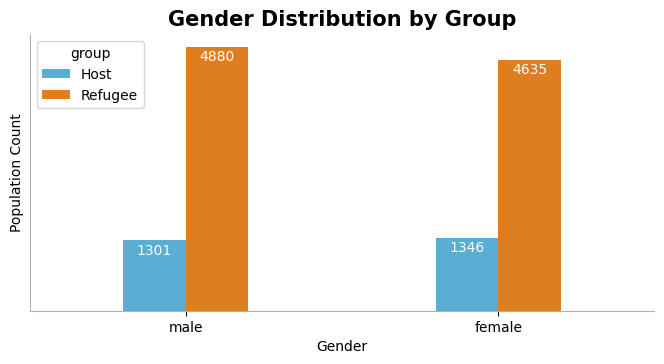

In [16]:
custom_palette = {'Host': '#46B4E7', 'Refugee': '#ff7e00'}

plt.figure(figsize=(7, 4))
ax = sns.countplot(data=combined_df, x='ind_gender', hue='group', palette=custom_palette, width=0.4)

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('Population Count')
ax.set_xlabel('Gender')

# Customizing spines
for spine_name, spine in ax.spines.items():
    if spine_name in ['left', 'bottom']:
        spine.set_visible(True)
        spine.set_color('#B0B0B0')  # faint grey
    else:
        spine.set_visible(False)

# Remove grid
ax.grid(False)

# Add count labels on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=-12, color='white')

plt.title('Gender Distribution by Group', fontsize=15, fontweight='bold')
plt.tight_layout(pad=2)
plt.show()

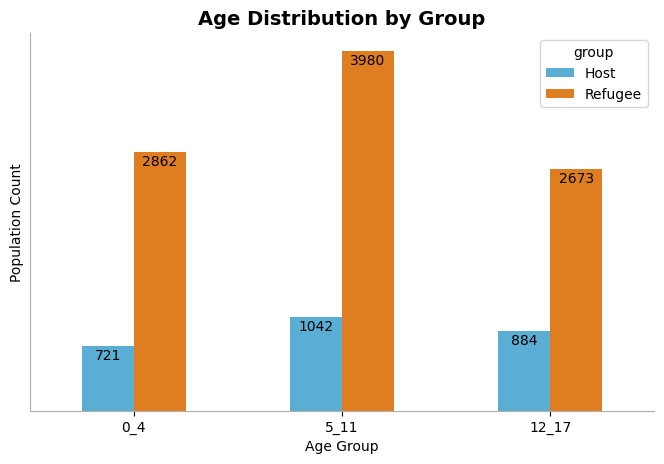

In [17]:
custom_palette = {'Host': '#46B4E7', 'Refugee': '#ff7e00'}

age_order = ['0_4', '5_11', '12_17']

plt.figure(figsize=(7, 5))
ax = sns.countplot(
    data=combined_df,
    x='ind_age',
    hue='group',
    order=age_order,
    palette=custom_palette,
    width=0.5
)

# Title and axis labels
plt.title('Age Distribution by Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count')

#Adding Data Labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=-12, color='black')

# Clean up axes and grid
ax.grid(False)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('Population Count')
ax.set_xlabel('Age Group')

# Show only bottom and left spines in faint grey
for spine_name, spine in ax.spines.items():
    if spine_name in ['left', 'bottom']:
        spine.set_visible(True)
        spine.set_color('#B0B0B0')
    else:
        spine.set_visible(False)

plt.tight_layout(pad=2)
plt.show()

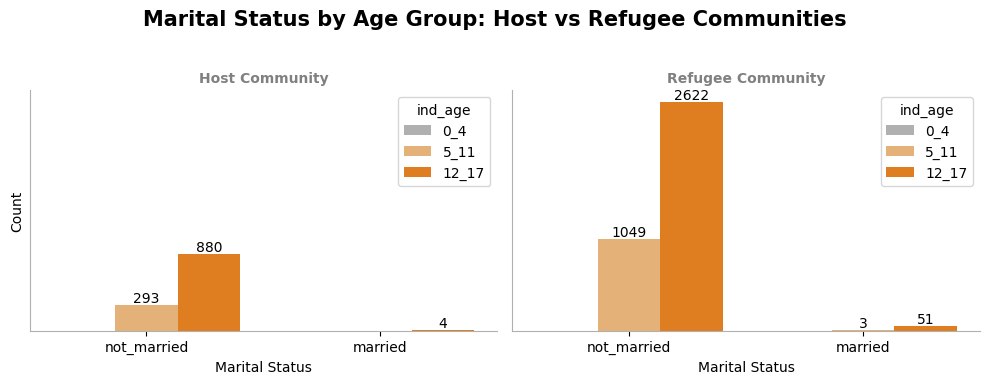

In [18]:
age_palette = {
    '0_4': '#b0b0b0',
    '5_11': '#F6B366',
    '12_17': '#ff7e00'
}

# Create subplots: one for host, one for refugee
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot for host group
sns.countplot(
    data=combined_df[combined_df['group'] == 'Host'],
    x='hh_marital',
    hue='ind_age',
    hue_order=['0_4', '5_11', '12_17'],
    palette=age_palette,
    ax=axes[0]
)
axes[0].set_title('Host Community', fontsize=10, fontweight='bold',color = 'Grey')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Population Count')

# Plot for refugee group
sns.countplot(
    data=combined_df[combined_df['group'] == 'Refugee'],
    x='hh_marital',
    hue='ind_age',
    hue_order=['0_4', '5_11', '12_17'],
    palette=age_palette,
    ax=axes[1]
)
axes[1].set_title('Refugee Community', fontsize=10, fontweight='bold', color = 'GREY')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('')

# Add data labels inside bars and clean up both plots
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=0, color='black')

    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.set_ylabel('Count')

    # Show only left and bottom spines in faint grey
    for spine_name, spine in ax.spines.items():
        if spine_name in ['left', 'bottom']:
            spine.set_visible(True)
            spine.set_color('#B0B0B0')  # faint grey
        else:
            spine.set_visible(False)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.1)

# Add a bold and large suptitle
plt.suptitle('Marital Status by Age Group: Host vs Refugee Communities', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

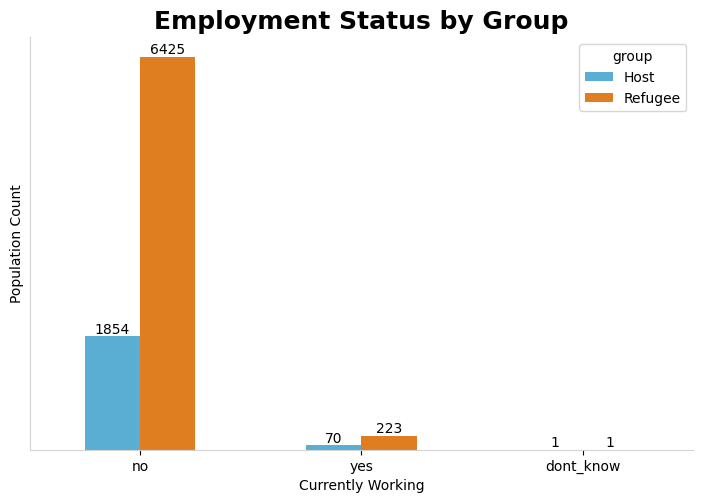

In [19]:
custom_palette = {'Host': '#46B4E7', 'Refugee': '#ff7e00'}

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=combined_df,
    x='currently_working_contributin_1',
    hue='group',
    palette=custom_palette,
    width=0.5
)

# Remove y-axis ticks, labels, and grid
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')
ax.grid(False)

# Hide all spines and then re-draw only left and bottom in faint grey
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('#d3d3d3')  # faint grey
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('#d3d3d3')

# Title and axis labels
plt.title('Employment Status by Group', fontsize=18, fontweight='bold')
plt.xlabel('Currently Working')
plt.ylabel('Population Count')

# Add count labels inside bars
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=0, color='black')

plt.tight_layout(pad=-3)
plt.show()

##  **Getting to Know the Data: Host vs Refugee Children**

Before diving into the deep analysis, we took a moment to explore the data and get a feel for the children behind the numbers. This early peek helps us spot patterns, understand the structure, and flag anything that might need extra attention later.

### Demographics at a Glance

- **Gender**  
  The gender split is pretty balanced in both groups - boys and girls are almost evenly represented, with only slight differences.

- **Age Groups**  
  Children are grouped into three age ranges: **0–4**, **5–11**, and **12–17**. The mix of ages varies between host and refugee communities.
  
- **Marital Status**  
  As expected, most younger kids are unmarried. But among the older teens, especially in the refugee group, a few are already married.
  
- **Working Children**  
  Some older children, particularly among refugees, reported working to help support their families. This shows how economic pressure can start early, and hints at child labor risks we’ll want to explore further.

### A Quick Note
- We conducted the above overview using **unweighted data**, which reflects the raw sample characteristics. This helps identify data structure and quality before applying population-level weights in later stages.
- We will apply weights in subsequent steps to ensure generalizability of our findings to the broader population.

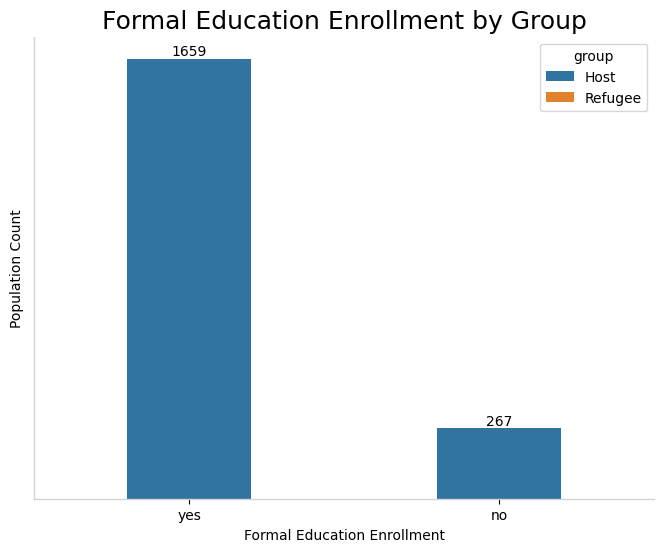

In [20]:
#Checking the status of formal education enrollment
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=combined_df, x='formal_edu_enrollment', hue='group',width=0.4)

# Customizing title
plt.title('Formal Education Enrollment by Group', fontsize=18)

# Customizing axes
plt.xlabel('Formal Education Enrollment')
plt.ylabel('Population Count')

# Hide y-axis tick values
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)  #

# Set only x and y axes in faint grey
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add bar labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=0, color='black')

plt.show()

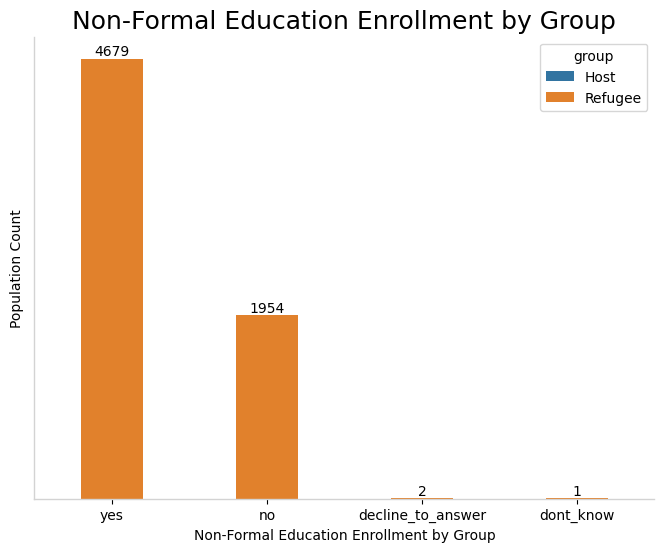

In [21]:
#Non formal education enrollment
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=combined_df, x='nonformal_edu_enrollment', hue='group',width=0.4)

# Customizing title
plt.title('Non-Formal Education Enrollment by Group', fontsize=18)

# Customizing axes
plt.xlabel('Non-Formal Education Enrollment by Group')
plt.ylabel('Population Count')

# Hide y-axis tick values
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)  #

# Set only x and y axes in faint grey
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add bar labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=0, color='black')

plt.show()


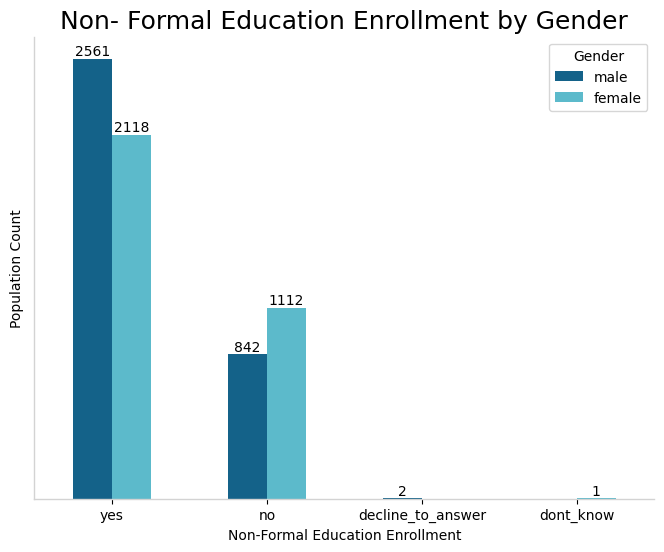

In [22]:
#Cheking non formal education enrollment by gender
custom_palette = {'male': '#00689D', 'female': '#4AC7DD'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(
                   data=combined_df.rename(columns={'ind_gender': 'Gender'}),
                   x='nonformal_edu_enrollment', hue='Gender', palette=custom_palette,
                   width=0.5)

# Customizing title
plt.title('Non- Formal Education Enrollment by Gender', fontsize=18)

# Customizing axes
plt.xlabel('Non-Formal Education Enrollment')
plt.ylabel('Population Count')  # No y-axis label

# Hide y-axis tick values
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)  # Optionally hide tick lines too

# Set only x and y axes in faint grey
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add bar labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=0, color='black')


plt.show()

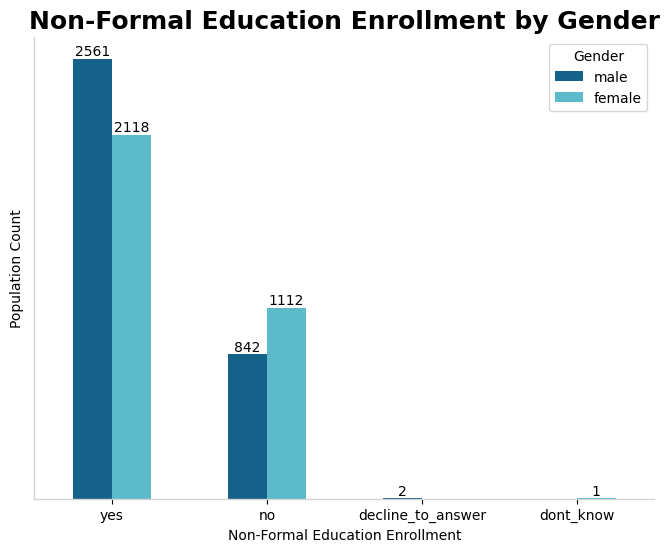

In [23]:
custom_palette = {'male': '#00689D', 'female': '#4AC7DD'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=combined_df.rename(columns={'ind_gender': 'Gender'}),
    x='nonformal_edu_enrollment',
    hue='Gender',
    palette=custom_palette,
    width=0.5
)

# Title
plt.title('Non-Formal Education Enrollment by Gender', fontsize=18, fontweight='bold')

# Axis labels
plt.xlabel('Non-Formal Education Enrollment')
plt.ylabel('Population Count')

# Hide y-axis ticks
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)

# Faint grey axis lines
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=0, color='black')

plt.show()


In [24]:
print(combined_df.columns)

Index(['pseudo_parent_id', 'pseudo_id', 'ind_age', 'ind_gender',
       'ind_relationship_hoh', 'hh_marital', 'currently_working_contributin_1',
       'direct_proxy', 'caregiver_available', 'proxy_resp_gender',
       'proxy_resp_age', 'difficulty_seeing', 'difficulty_hearing',
       'difficulty_walking', 'difficulty_remembering', 'difficulty_self_care',
       'difficulty_communicating', 'challenges_due_impairment',
       'formal_edu_enrollment', 'formal_edu_attendance',
       'edu_safe_environment', 'edu_safe_env_security_concern_1',
       'edu_safe_env_long_travel_time', 'edu_safe_env_school_attack',
       'edu_safe_env_armed_group_recr_1', 'edu_safe_env_gender_sexual_vi_1',
       'edu_safe_env_verbal_bullying__1', 'edu_safe_env_physical_bullyin_1',
       'edu_safe_env_physical_punishm_1', 'edu_safe_env_unsafe_infrastru_1',
       'edu_safe_env_teaching_staff_n_1', 'edu_safe_env_lack_referral_me_1',
       'edu_safe_env_discr', 'edu_safe_env_oth', 'edu_safe_env_decline_answe

In [25]:
from scipy.stats import norm

# Filter data with non-null education enrollment
edu_df = combined_df[combined_df['formal_edu_enrollment'].notna()]

# Initialize a results list
results = []

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Loop over the two groups: Host and Refugee
for grp in edu_df['group'].unique():
    sub_df = edu_df[edu_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    # Loop over each enrollment category
    for category in sub_df['formal_edu_enrollment'].unique():
        cat_df = sub_df[sub_df['formal_edu_enrollment'] == category]
        p_hat = cat_df['weights'].sum() / total_weight
        se = np.sqrt((p_hat * (1 - p_hat)) / total_weight)
        ci_low = (p_hat - z * se) * 100
        ci_high = (p_hat + z * se) * 100

        results.append({
            'group': grp,
            'formal_edu_enrollment': category,
            'weighted_percentage': round(p_hat * 100, 2),
            'Confidence Interval': f"[{round(ci_low, 2)}%, {round(ci_high, 2)}%]"
        })

# Create a DataFrame from results
final_df = pd.DataFrame(results)

# Reorder columns
final_df = final_df[['group', 'formal_edu_enrollment', 'weighted_percentage', 'Confidence Interval']]

# Display the table
print(final_df)


  group formal_edu_enrollment  weighted_percentage Confidence Interval
0  Host                   yes                86.08    [84.54%, 87.62%]
1  Host                    no                13.92    [12.38%, 15.46%]


In [26]:
# Filter data with non-null education attendance
edu_df = combined_df[combined_df['formal_edu_attendance'].notna()]

# Initialize a results list
results = []

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Loop over the two groups: Host and Refugee
for grp in edu_df['group'].unique():
    sub_df = edu_df[edu_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    # Loop over each attendance category
    for category in sub_df['formal_edu_attendance'].unique():
        cat_df = sub_df[sub_df['formal_edu_attendance'] == category]
        p_hat = cat_df['weights'].sum() / total_weight
        se = np.sqrt((p_hat * (1 - p_hat)) / total_weight)
        ci_low = (p_hat - z * se) * 100
        ci_high = (p_hat + z * se) * 100

        results.append({
            'group': grp,
            'formal_edu_attendance': category,
            'weighted_percentage': round(p_hat * 100, 2),
            'Confidence Interval': f"[{round(ci_low, 2)}%, {round(ci_high, 2)}%]"
        })

# Create a DataFrame from results
final_df = pd.DataFrame(results)

# Reorder columns
final_df = final_df[['group', 'formal_edu_attendance', 'weighted_percentage', 'Confidence Interval']]

# Display the table
print(final_df)


  group formal_edu_attendance  weighted_percentage Confidence Interval
0  Host                    no                 1.64      [1.03%, 2.25%]
1  Host                   yes                98.36    [97.75%, 98.97%]


In [27]:
# Filter dataset
edu_df = combined_df[combined_df['nonformal_edu_enrollment'].notna()]

# Confidence level
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

# Initialize a results list
results = []

# Loop over the two groups: Host and Refugee
for grp in edu_df['group'].unique():
    sub_df = edu_df[edu_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    # Group by enrollment response
    grouped = sub_df.groupby('nonformal_edu_enrollment')['weights'].agg(['sum', 'count']).reset_index()
    grouped.columns = ['nonformal_edu_enrollment', 'weight_sum', 'count']

    # Compute weighted percentage
    grouped['weighted_percentage'] = 100 * grouped['weight_sum'] / total_weight

    # Estimate standard error and confidence interval
    p = grouped['weight_sum'] / total_weight
    n_eff = total_weight  # assuming total weight reflects effective n
    se = np.sqrt(p * (1 - p) / n_eff) * 100  # multiply by 100 to match percentage scale
    ci_low = grouped['weighted_percentage'] - z * se
    ci_high = grouped['weighted_percentage'] + z * se
    grouped['confidence_interval'] = ci_low.round(2).astype(str) + ' – ' + ci_high.round(2).astype(str)

    # Add group column
    grouped['group'] = grp

    # Select and reorder columns
    grouped = grouped[['group', 'nonformal_edu_enrollment', 'weighted_percentage', 'confidence_interval']]
    grouped['weighted_percentage'] = grouped['weighted_percentage'].round(2)

    results.append(grouped)

# Combine all group results
final_df = pd.concat(results, ignore_index=True)

# Output the final table
print(final_df)


     group nonformal_edu_enrollment  weighted_percentage confidence_interval
0  Refugee        decline_to_answer                 0.02        -0.01 – 0.06
1  Refugee                dont_know                 0.02        -0.01 – 0.06
2  Refugee                       no                29.79        28.69 – 30.9
3  Refugee                      yes                70.16       69.06 – 71.27


In [28]:
# Filter dataset for non-missing attendance
edu_df = combined_df[combined_df['nonformal_edu_attendance'].notna()]

# Set confidence level
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

# Initialize a results list
results = []

# Loop over the two groups: Host and Refugee
for grp in edu_df['group'].unique():
    sub_df = edu_df[edu_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    # Group by attendance responses
    grouped = sub_df.groupby('nonformal_edu_attendance')['weights'].agg(['sum', 'count']).reset_index()
    grouped.columns = ['nonformal_edu_attendance', 'weight_sum', 'count']

    # Compute weighted percentage
    grouped['weighted_percentage'] = 100 * grouped['weight_sum'] / total_weight

    # Estimate standard error and confidence interval
    p = grouped['weight_sum'] / total_weight
    n_eff = total_weight
    se = np.sqrt(p * (1 - p) / n_eff) * 100
    ci_low = grouped['weighted_percentage'] - z * se
    ci_high = grouped['weighted_percentage'] + z * se
    grouped['confidence_interval'] = ci_low.round(2).astype(str) + ' – ' + ci_high.round(2).astype(str)

    # Add group column
    grouped['group'] = grp

    # Select and reorder columns
    grouped = grouped[['group', 'nonformal_edu_attendance', 'weighted_percentage', 'confidence_interval']]
    grouped['weighted_percentage'] = grouped['weighted_percentage'].round(2)

    results.append(grouped)

# Combine the results into final table
final_df = pd.concat(results, ignore_index=True)

# Display the final table
print(final_df)


     group nonformal_edu_attendance  weighted_percentage confidence_interval
0  Refugee        decline_to_answer                 0.03        -0.02 – 0.09
1  Refugee                       no                 2.57         2.12 – 3.03
2  Refugee                      yes                97.39       96.94 – 97.85


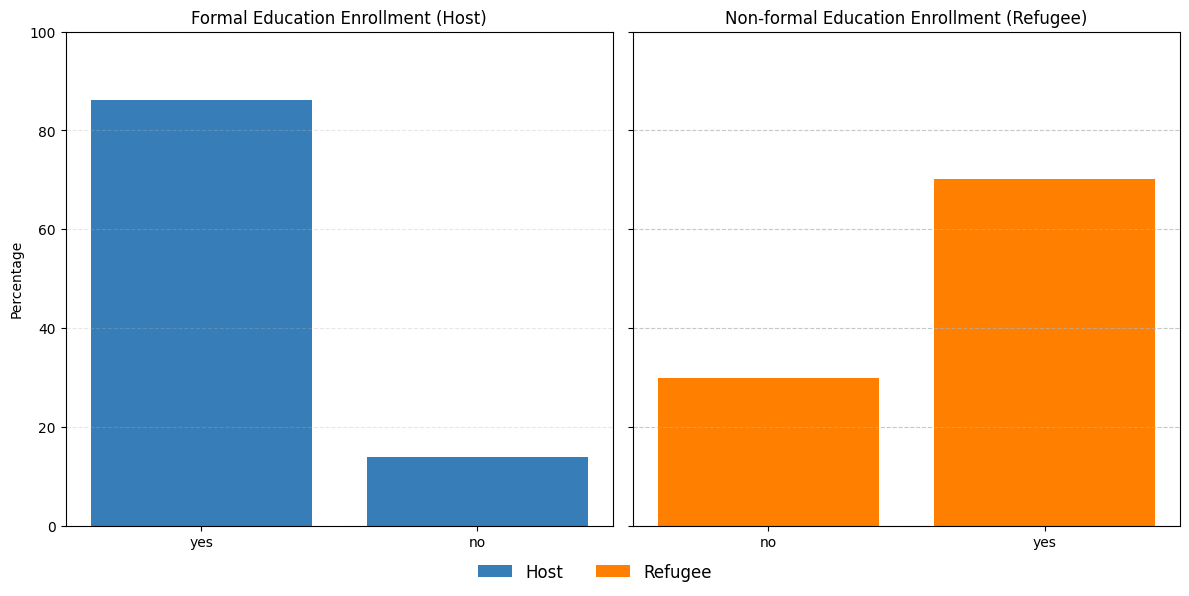

In [54]:
# Data for formal education (Host only)
formal_data = pd.DataFrame({
    'group': ['yes', 'no'],
    'weighted_percentage': [86.08, 13.92]
})

# Data for non-formal education (Refugee only)
nonformal_data = pd.DataFrame({
    'group': ['no', 'yes'],
    'weighted_percentage': [29.79, 70.16]
})

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Colors
host_color = '#377eb8'
refugee_color = '#ff7f00'

# Bar chart for formal education (Host)
axes[0].bar(formal_data['group'], formal_data['weighted_percentage'], color=host_color)
axes[0].set_title('Formal Education Enrollment (Host)')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Bar chart for non-formal education (Refugee)
axes[1].bar(nonformal_data['group'], nonformal_data['weighted_percentage'], color=refugee_color)
axes[1].set_title('Non-formal Education Enrollment (Refugee)')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Create a custom legend
legend_elements = [
    Patch(facecolor=host_color, label='Host'),
    Patch(facecolor=refugee_color, label='Refugee')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=2, frameon=False, fontsize=12)

# Display the plots
plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
plt.show()


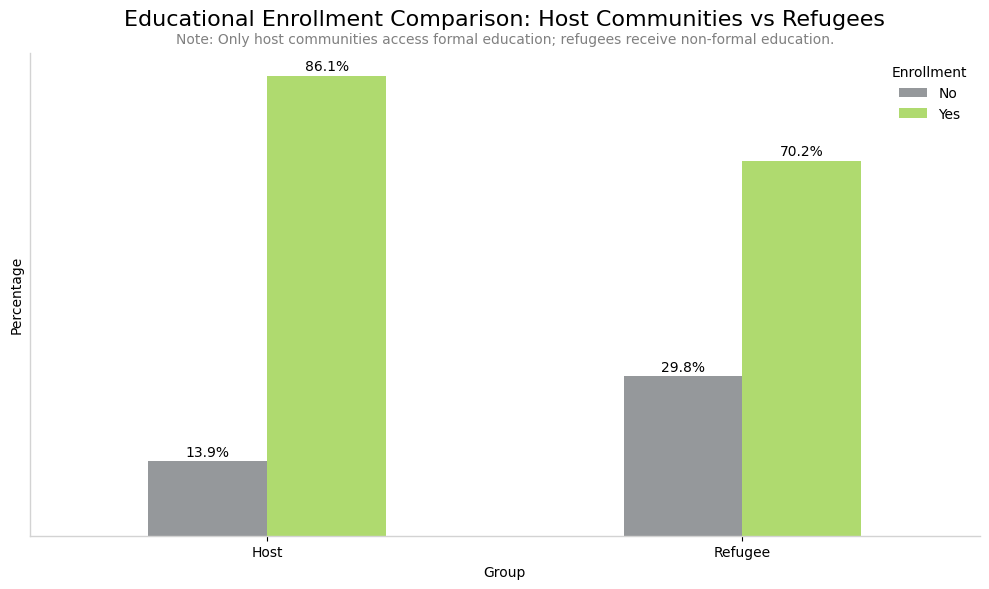

In [29]:
# Normalize 'edu_enrollment' values
combined_df['edu_enrollment'] = combined_df['edu_enrollment'].astype(str).str.strip().str.title()

# Filter only 'Yes' and 'No'
edu_df = combined_df[combined_df['edu_enrollment'].isin(['Yes', 'No'])]

# Group and compute weights
grouped_data = edu_df.groupby(['group', 'edu_enrollment'], as_index=False)['weights'].sum()

# Get total weights per group
total_weight_per_group = edu_df.groupby('group')['weights'].sum().reset_index()
total_weight_per_group = total_weight_per_group.rename(columns={'weights': 'group_total_weight'})

# Merge and calculate percentages
grouped_data = grouped_data.merge(total_weight_per_group, on='group')
grouped_data['weighted_percentage'] = (grouped_data['weights'] / grouped_data['group_total_weight']) * 100

# Plot setup
plt.figure(figsize=(10, 6))
palette = {'Yes': '#B2EC5D', 'No': '#94989c'}
ax = sns.barplot(
    x='group',
    y='weighted_percentage',
    hue='edu_enrollment',
    width=0.5,
    data=grouped_data,
    palette=palette
)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, color='black')

# Remove grid and axis lines
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)

# Set x-axis labels (modified part)
ax.set_xticks(range(len(grouped_data['group'].unique())))  # Ensure all groups are shown
ax.set_xticklabels(grouped_data['group'].unique(), rotation=0)  # Display actual group names (e.g., Host, Refugee)

ax.set_yticks([])
ax.set_xlabel("Group")
ax.set_ylabel("Percentage")

# Titles
plt.title('Educational Enrollment Comparison: Host Communities vs Refugees', fontsize=16, pad=20)
plt.text(
    0.5, 1.02,
    "Note: Only host communities access formal education; refugees receive non-formal education.",
    fontsize=10,
    color='gray',
    ha='center',

    transform=ax.transAxes
)

ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
plt.legend(title='Enrollment', loc='upper right', frameon=False)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()

In [30]:
#Checking education barriers
# List of relevant barrier columns
barrier_cols = [
    'edu_safe_env_security_concern_1',
    'edu_safe_env_long_travel_time',
    'edu_safe_env_school_attack',
    'edu_safe_env_armed_group_recr_1',
    'edu_safe_env_gender_sexual_vi_1',
    'edu_safe_env_verbal_bullying__1',
    'edu_safe_env_physical_bullyin_1',
    'edu_safe_env_physical_punishm_1',
    'edu_safe_env_unsafe_infrastru_1',
    'edu_safe_env_teaching_staff_n_1',
    'edu_safe_env_lack_referral_me_1',
    'edu_safe_env_discr',
    'edu_safe_env_oth',
]

# Initialize result container
barrier_data = []

# Loop through each group
for grp in combined_df['group'].unique():
    sub_df = combined_df[combined_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    for col in barrier_cols:
        if col in sub_df.columns:
            weighted_sum = sub_df[sub_df[col] == 1]['weights'].sum()
            percent = 100 * weighted_sum / total_weight

            barrier_data.append({
                'group': grp,
                'barrier': col,
                'weighted_percentage': round(percent, 2)
            })

# Convert to DataFrame
barrier_df = pd.DataFrame(barrier_data)

# Sort for readability
barrier_df = barrier_df.sort_values(by=['group', 'weighted_percentage'], ascending=[True, False])
barrier_df.reset_index(drop=True, inplace=True)

print(barrier_df)


      group                          barrier  weighted_percentage
0      Host    edu_safe_env_long_travel_time                 1.78
1      Host  edu_safe_env_unsafe_infrastru_1                 0.34
2      Host  edu_safe_env_security_concern_1                 0.20
3      Host  edu_safe_env_gender_sexual_vi_1                 0.04
4      Host       edu_safe_env_school_attack                 0.00
5      Host  edu_safe_env_armed_group_recr_1                 0.00
6      Host  edu_safe_env_verbal_bullying__1                 0.00
7      Host  edu_safe_env_physical_bullyin_1                 0.00
8      Host  edu_safe_env_physical_punishm_1                 0.00
9      Host  edu_safe_env_teaching_staff_n_1                 0.00
10     Host  edu_safe_env_lack_referral_me_1                 0.00
11     Host               edu_safe_env_discr                 0.00
12     Host                 edu_safe_env_oth                 0.00
13  Refugee  edu_safe_env_security_concern_1                 0.51
14  Refuge

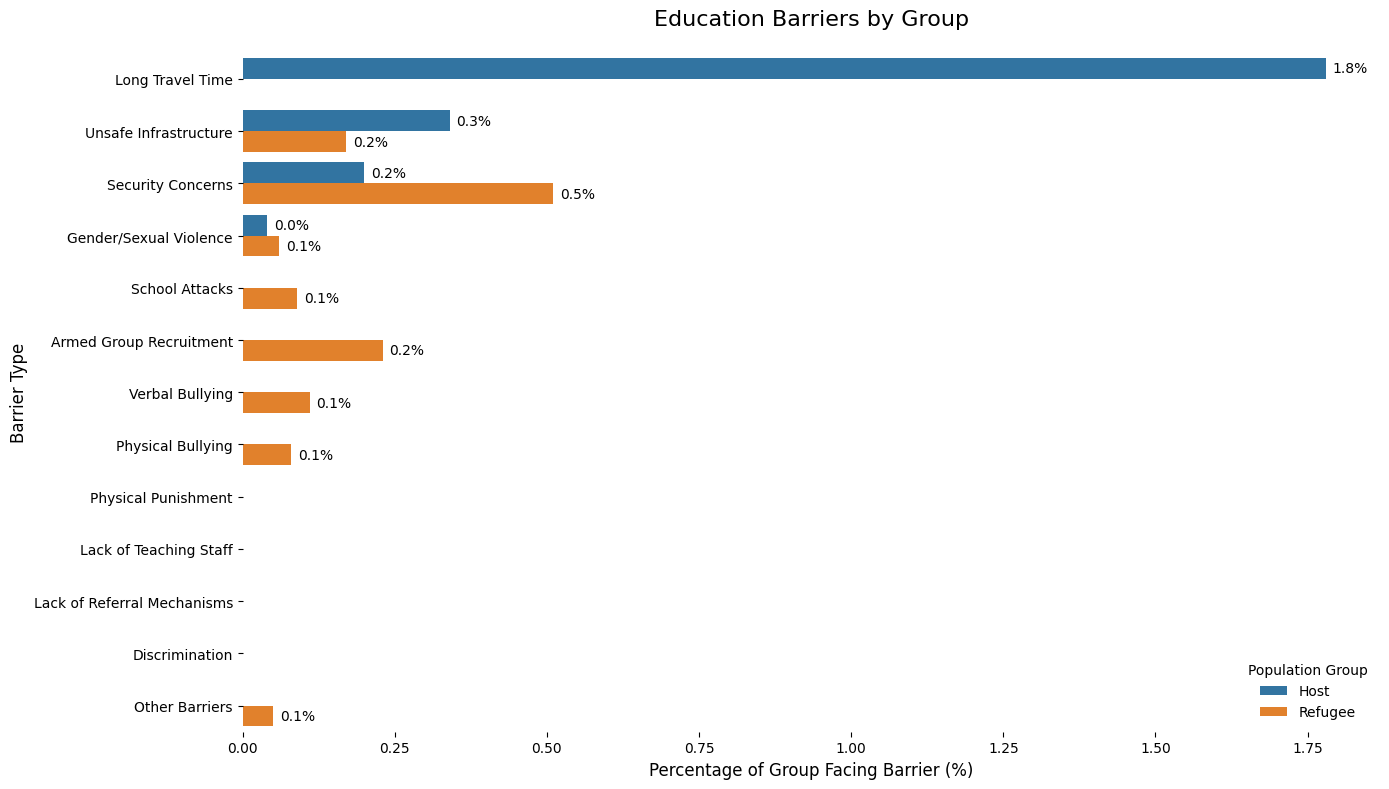

group                        Host  Refugee
barrier                                   
Armed Group Recruitment      0.00     0.23
Discrimination               0.00     0.00
Gender/Sexual Violence       0.04     0.06
Lack of Referral Mechanisms  0.00     0.00
Lack of Teaching Staff       0.00     0.00
Long Travel Time             1.78     0.00
Other Barriers               0.00     0.05
Physical Bullying            0.00     0.08
Physical Punishment          0.00     0.00
School Attacks               0.00     0.09
Security Concerns            0.20     0.51
Unsafe Infrastructure        0.34     0.17
Verbal Bullying              0.00     0.11


In [31]:
# Define all barrier columns (as per your original list)
barrier_cols = [
    'edu_safe_env_security_concern_1',
    'edu_safe_env_long_travel_time',
    'edu_safe_env_school_attack',
    'edu_safe_env_armed_group_recr_1',
    'edu_safe_env_gender_sexual_vi_1',
    'edu_safe_env_verbal_bullying__1',
    'edu_safe_env_physical_bullyin_1',
    'edu_safe_env_physical_punishm_1',
    'edu_safe_env_unsafe_infrastru_1',
    'edu_safe_env_teaching_staff_n_1',
    'edu_safe_env_lack_referral_me_1',
    'edu_safe_env_discr',
    'edu_safe_env_oth'
]

# Create human-readable names for barriers
barrier_labels = {
    'edu_safe_env_security_concern_1': 'Security Concerns',
    'edu_safe_env_long_travel_time': 'Long Travel Time',
    'edu_safe_env_school_attack': 'School Attacks',
    'edu_safe_env_armed_group_recr_1': 'Armed Group Recruitment',
    'edu_safe_env_gender_sexual_vi_1': 'Gender/Sexual Violence',
    'edu_safe_env_verbal_bullying__1': 'Verbal Bullying',
    'edu_safe_env_physical_bullyin_1': 'Physical Bullying',
    'edu_safe_env_physical_punishm_1': 'Physical Punishment',
    'edu_safe_env_unsafe_infrastru_1': 'Unsafe Infrastructure',
    'edu_safe_env_teaching_staff_n_1': 'Lack of Teaching Staff',
    'edu_safe_env_lack_referral_me_1': 'Lack of Referral Mechanisms',
    'edu_safe_env_discr': 'Discrimination',
    'edu_safe_env_oth': 'Other Barriers'
}

# Initialize result container
barrier_data = []

# Calculate for each group
for grp in combined_df['group'].unique():
    # Filter for current group
    sub_df = combined_df[combined_df['group'] == grp]
    total_weight = sub_df['weights'].sum()

    # Calculate for each barrier
    for col in barrier_cols:
        if col in sub_df.columns:
            # Count weighted responses where barrier = 1 (exists)
            weighted_sum = sub_df.loc[sub_df[col].eq(1) & sub_df[col].notna(), 'weights'].sum()
            percent = (weighted_sum / total_weight) * 100 if total_weight > 0 else 0

            barrier_data.append({
                'group': grp,
                'barrier': barrier_labels.get(col, col),
                'weighted_percentage': round(percent, 2)
            })

# Create DataFrame
barrier_df = pd.DataFrame(barrier_data)

# Sort by group and percentage
barrier_df = barrier_df.sort_values(['group', 'weighted_percentage'], ascending=[True, False])

# Visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=barrier_df,
    x='weighted_percentage',
    y='barrier',
    hue='group',
    palette={'Host': '#1f77b4', 'Refugee': '#ff7f0e'}
)

# Add data labels INSIDE the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only label bars with positive values
        ax.text(
            width + 0.04,  # Position label in the middle of the bar
            p.get_y() + p.get_height() / 2,  # Vertically center
            f'{width:.1f}%',  # Format: 1 decimal place
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='black',  # White text for visibility
            fontsize=10
            #fontweight='bold'
        )

plt.title('Education Barriers by Group', fontsize=16, pad=20)
plt.xlabel('Percentage of Group Facing Barrier (%)', fontsize=12)
plt.ylabel('Barrier Type', fontsize=12)
plt.legend(title='Population Group', frameon=False)

# Adjust spines for cleaner look
sns.despine(left=True, bottom=True)
ax.grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()

# Display table
print(barrier_df.pivot(index='barrier', columns='group', values='weighted_percentage'))


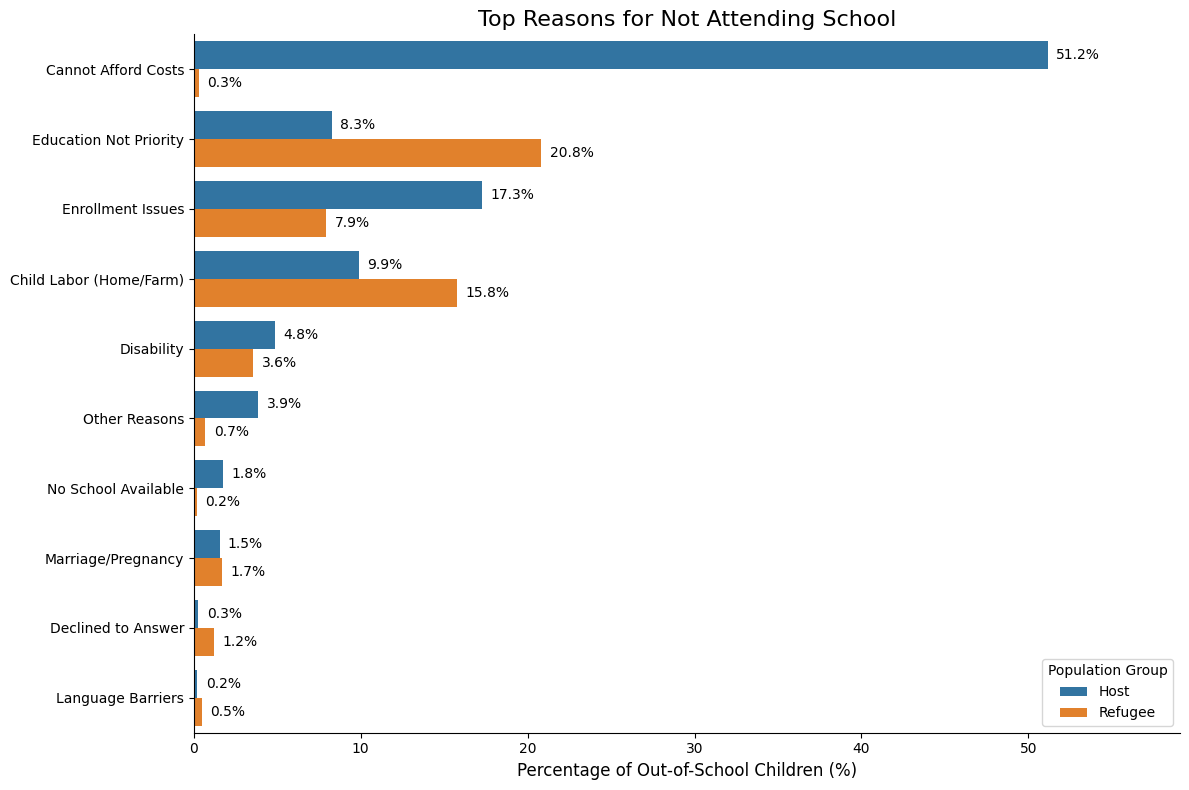


📋 Summary Table:

  group                  reason  weighted_percentage
   Host     Cannot Afford Costs                51.16
   Host       Enrollment Issues                17.28
   Host Child Labor (Home/Farm)                 9.91
   Host  Education Not Priority                 8.27
   Host              Disability                 4.84
   Host           Other Reasons                 3.85
   Host     No School Available                 1.75
   Host      Marriage/Pregnancy                 1.54
   Host                     NaN                 0.93
   Host      Declined to Answer                 0.27
   Host       Language Barriers                 0.21
Refugee                     NaN                22.87
Refugee  Education Not Priority                20.83
Refugee Child Labor (Home/Farm)                15.78
Refugee                     NaN                 9.01
Refugee       Enrollment Issues                 7.94
Refugee                     NaN                 6.08
Refugee                    

In [32]:
# Step 1: Filter not enrolled children per group logic
hosts_not_enrolled = combined_df[
    (combined_df['group'] == 'Host') &
    (combined_df['formal_edu_enrollment'].str.lower() == 'no')
]

refugees_not_enrolled = combined_df[
    (combined_df['group'] == 'Refugee') &
    (combined_df['nonformal_edu_enrollment'].str.lower() == 'no')
]

# Combine both
not_enrolled = pd.concat([hosts_not_enrolled, refugees_not_enrolled])
not_enrolled = not_enrolled.dropna(subset=['edu_non_access_why'])

# Step 2: Human-readable labels
reason_labels = {
    'cannot_afford_education_costs': 'Cannot Afford Costs',
    'child_helping_at_home_farm': 'Child Labor (Home/Farm)',
    'decline_to_answer': 'Declined to Answer',
    'disability': 'Disability',
    'education_is_not_a_priority': 'Education Not Priority',
    'lack_school': 'No School Available',
    'language_issues': 'Language Barriers',
    'marriage_pregnancy': 'Marriage/Pregnancy',
    'other': 'Other Reasons',
    'protection_risks_while_commuting_to_school': 'Safety Risks',
    'unable_to_register_enrol_child_in_school': 'Enrollment Issues'
}

# Step 3: Group, sum weights
edu_barriers = (
    not_enrolled
    .groupby(['group', 'edu_non_access_why'], observed=True)['weights']
    .sum()
    .reset_index()
    .rename(columns={'weights': 'weighted_sum'})
)

# Step 4: Weighted percentages per group
edu_barriers['weighted_percentage'] = (
    100 * edu_barriers['weighted_sum'] /
    edu_barriers.groupby('group')['weighted_sum'].transform('sum')
).round(2)

edu_barriers['reason'] = edu_barriers['edu_non_access_why'].map(reason_labels)

# Step 5: Plotting with data labels
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=edu_barriers.sort_values('weighted_percentage', ascending=False),
    y='reason',
    x='weighted_percentage',
    hue='group',
    palette={'Host': '#1f77b4', 'Refugee': '#ff7f0e'},
    orient='h'
)

# Add data labels (placed just outside bars)
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only label bars with values
        ax.text(
            width + 0.5,  # Position 0.5% right of bar end
            p.get_y() + p.get_height()/2,  # Vertical center
            f'{width:.1f}%',
            ha='left',  # Left-align to stick to bar
            va='center',
            color='black',
            fontsize=10
        )

# Adjust x-axis limit to fit labels
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)  # 10% padding

plt.title('Top Reasons for Not Attending School', fontsize=16)
plt.xlabel('Percentage of Out-of-School Children (%)', fontsize=12)
plt.ylabel('')
plt.legend(title='Population Group')
sns.despine()
plt.tight_layout()
plt.savefig("not attending school reasons.png")
plt.show()

# Step 6: Table display
print("\n📋 Summary Table:\n")
print(
    edu_barriers[['group', 'reason', 'weighted_percentage']]
    .sort_values(['group', 'weighted_percentage'], ascending=[True, False])
    .to_string(index=False)
)


<Figure size 1400x800 with 0 Axes>

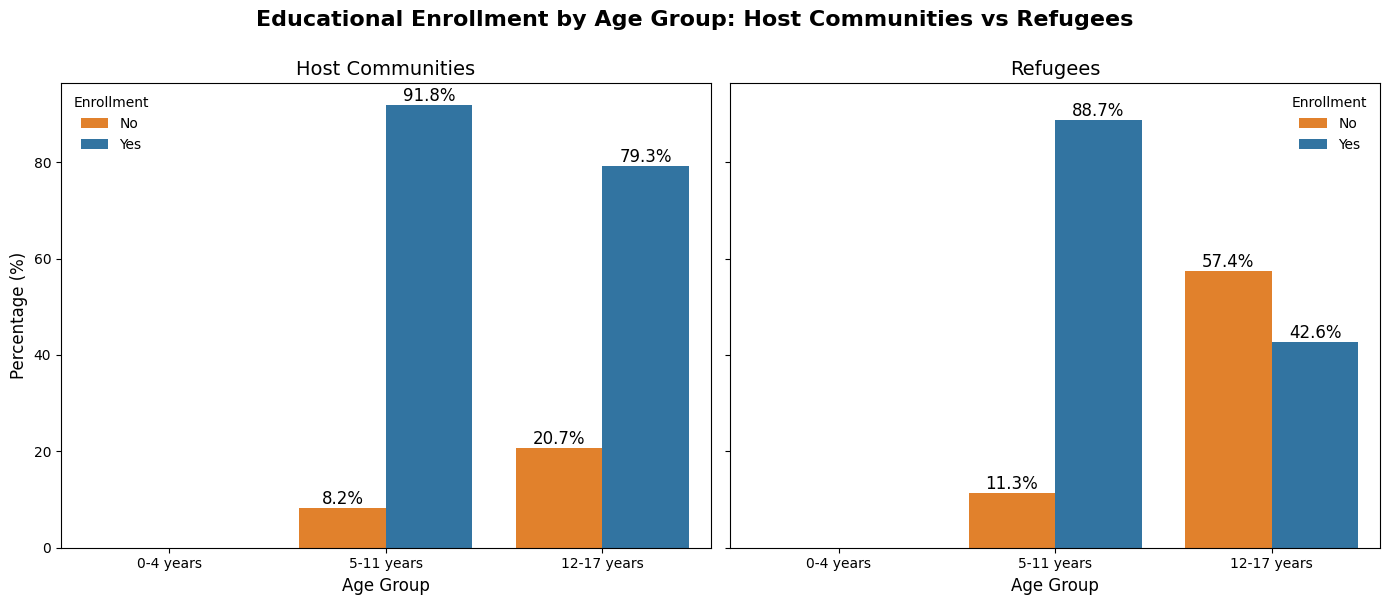

In [33]:
# Prepare the data
# Clean enrollment data
combined_df['edu_enrollment'] = combined_df['edu_enrollment'].astype(str).str.strip().str.title()

# Filter only valid responses and rows with age data
edu_df = combined_df[
    (combined_df['edu_enrollment'].isin(['Yes', 'No'])) &
    (combined_df['ind_age'].isin(['0_4', '5_11', '12_17']))
].copy()

# Rename age categories for better visualization
age_category_names = {
    '0_4': '0-4 years',
    '5_11': '5-11 years',
    '12_17': '12-17 years'
}
edu_df['age_group'] = edu_df['ind_age'].map(age_category_names)

# Ensure proper ordering of age groups
age_group_order = ['0-4 years', '5-11 years', '12-17 years']

# Group and compute weights by group, age group, and enrollment status
grouped_data = edu_df.groupby(['group', 'age_group', 'edu_enrollment'], as_index=False)['weights'].sum()

# Get total weights per group and age group
total_weights = edu_df.groupby(['group', 'age_group'])['weights'].sum().reset_index()
total_weights = total_weights.rename(columns={'weights': 'group_age_total_weight'})

# Merge and calculate percentages
grouped_data = grouped_data.merge(total_weights, on=['group', 'age_group'])
grouped_data['weighted_percentage'] = (grouped_data['weights'] / grouped_data['group_age_total_weight']) * 100

# Plot setup
plt.figure(figsize=(14, 8))

# Create subplots - one for each group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
palette = {'Yes': '#1f77b4', 'No': '#ff7f0e'}

# Plot Host communities
host_data = grouped_data[grouped_data['group'] == 'Host']
sns.barplot(
    x='age_group',
    y='weighted_percentage',
    hue='edu_enrollment',
    data=host_data,
    palette=palette,
    ax=ax1,
    order=age_group_order
)
ax1.set_title('Host Communities', fontsize=14)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.grid(False, axis='x')
ax1.legend(title='Enrollment', frameon=False)

# Plot Refugees
refugee_data = grouped_data[grouped_data['group'] == 'Refugee']
sns.barplot(
    x='age_group',
    y='weighted_percentage',
    hue='edu_enrollment',
    data=refugee_data,
    palette=palette,
    ax=ax2,
    order=age_group_order
)
ax2.set_title('Refugees', fontsize=14)
ax2.set_xlabel('Age Group', fontsize=12)
ax2.set_ylabel('')
ax2.grid(False, axis='x')
ax2.legend(title='Enrollment', frameon=False)

# Add data labels to both plots
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=0, fontsize=12,)

# Main title
plt.suptitle('Educational Enrollment by Age Group: Host Communities vs Refugees', fontsize=16, y=1,fontweight='bold')

# Adjust layout
plt.tight_layout()

# Add footnote
#plt.figtext(0.5, -0.1,
#           "Note: Enrollment percentages are weighted to be representative of the population",
#           ha="center", fontsize=10, color='gray')


plt.savefig("education enrollment by age.png")
plt.show()

### **Education Analysis: Host vs Refugee Children**

As we explored the education data more deeply, striking contrasts between **host** and **refugee** children emerged—telling a nuanced story of progress, exclusion, and the urgent need for tailored interventions.

#### **What We Found**

####  **Access to Education**
- **Host children** are **well integrated into formal education**, with:
  - **86% enrolled** and **98% attending** regularly.
- In contrast, **refugee children** rely more on **non-formal education**:
  - **70% enrolled** and **97% attending**—highlighting systemic barriers to formal schooling.

While host community children are successfully integrated into formal education systems (86% enrolled, 98% attending), refugee children face systemic barriers that limit their access to structured schooling.  Despite a strong attendance rate of 97%, only 70% are enrolled in non-formal education, highlighting that the real barrier lies not in attendance but in initial access to formal education.

This disparity reveals gaps in policy and infrastructure, where refugee education is often supported through temporary or alternative programs rather than equitable integration into national systems. To achieve inclusive education, efforts must prioritize expanding formal school access for displaced learners while maintaining their current attendance momentum.

#### **Age-Based Enrollment Patterns**
1.  **Early Childhood (0–4 years):**  
  Enrollment is **0%** for both host and refugee children—indicating **very limited or no access** to early childhood education.

2. **High Enrollment for Younger Children**:  
   Both host communities and refugees have very high enrollment rates for the 5–11 years age group (91.8% for hosts and 88.7% for refugees), meaning that primary school enrollment is relatively strong for both groups.

3. **Sharp Drop in Enrollment for Teenagers (12–17 years)**:  
   - In host communities, enrollment drops but remains relatively high at **79.3%**.  
   - Among refugees, enrollment drops drastically to **42.6%** — meaning **more than half (57.4%)** of refugee teenagers are **not enrolled** in school.

**Disparity Worsens with Age**:  
   The gap between host communities and refugees **widens** as children grow older, especially visible in the 12–17 years group. Host teenagers are almost **twice as likely** to stay enrolled compared to refugee teenagers.

**Summary conclusion**:  
 **Primary education access** is fairly good for both groups, though slightly lower for refugees.  
 **Secondary education access** shows a **major inequality**, with refugee teenagers facing much greater challenges in staying enrolled.

####  **Barriers to Safe Learning**
- **Host children** cite **long travel times (1.78%)** as the main barrier, with other safety-related issues near zero.
- **Refugee children** report:
  - **Security concerns (0.51%)**
  - **Armed group recruitment (0.23%)**
  - **Bullying, unsafe infrastructure, and gender-based violence**, all contributing to a fragile educational environment.

#### **Why Some Children Miss Out**
- For **host families**, the top issue is **cost**—over **half (51%)** of non-attending children come from homes that simply can’t afford schooling.
- Among **refugees**, **lack of educational priority (21%)** and **child labor (16%)** dominate the reasons for non-attendance.
- Notably, **cost is rarely cited by refugees (0.3%)**, perhaps due to humanitarian support covering school fees.

###  **What This Tells Us – And What We Can Do**

####  1. **Bridge Refugee Children into Formal Schooling**
> With most enrolled in non-formal programs, refugee children need structured pathways to **transition into accredited education**.

####  2. **Re-engage Refugees Adolescents**
> Prioritize re-engagement of out-of-school refugee teens through flexible learning models such as evening classes and catch-up programs. Invest in the construction or expansion of secondary schools near camps, and provide scholarships or cash incentives to encourage continued attendance. Promote vocational and life skills programs tailored to older teens facing barriers to re-entry.

#### 3. **Subsidize Schooling for Host Families**
> Since **cost is the biggest hurdle**, providing **free supplies, meals, and uniforms** can keep more children in classrooms.

####  4. **Strengthen Safe Learning Spaces for Refugees**
> Small but impactful numbers cite **security, violence, and bullying**—suggesting a need for **trauma-informed, safe, and inclusive school environments**.

####  5. **Revive the Value of Education in Refugee Communities**
> Awareness campaigns and **community-led mobilization** could help shift perceptions around education’s long-term value.

####  6. **Support Children with Disabilities**
> Both groups include children left behind due to **disability**. Expanding **inclusive education frameworks and special needs support** will ensure no child is excluded.


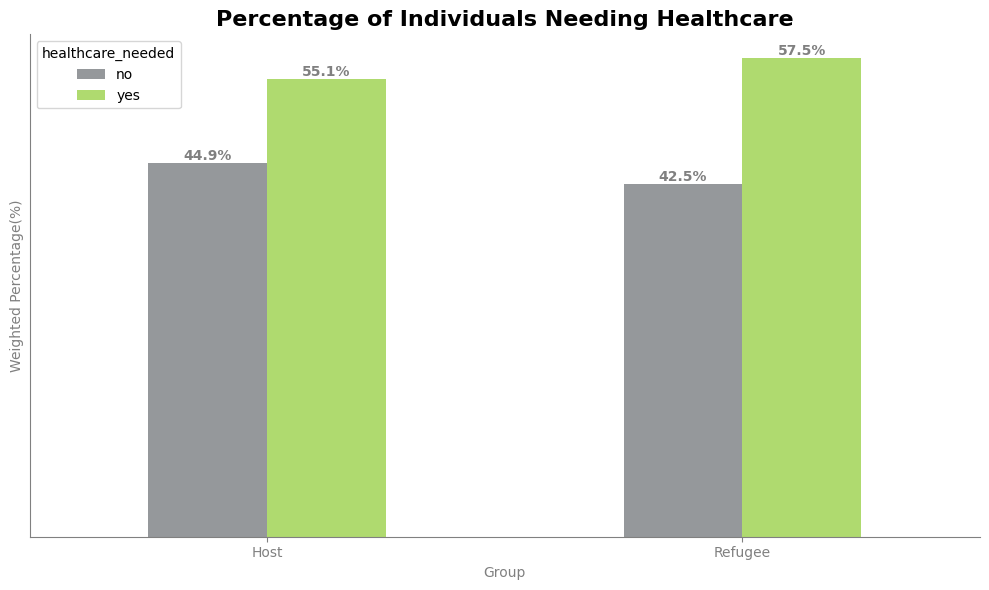

In [34]:
# Custom color palette
custom_palette = {'yes': '#B2EC5D', 'no': '#94989c'}

# Rename column for clarity in legend
combined_df = combined_df.rename(columns={'health_needed_healthcare': 'healthcare_needed'})

# Calculate weighted % of people who needed healthcare per group
healthcare_need = combined_df[combined_df['healthcare_needed'].notna()].groupby(['group', 'healthcare_needed']).apply(
    lambda x: x['weights'].sum()
).reset_index(name='weighted_count')

# Get total weights for normalization
totals = combined_df[combined_df['healthcare_needed'].notna()].groupby('group')['weights'].sum().to_dict()
healthcare_need['weighted_percent'] = healthcare_need.apply(
    lambda row: (row['weighted_count'] / totals[row['group']]) * 100, axis=1
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=healthcare_need,
    x='group',
    y='weighted_percent',
    hue='healthcare_needed',
    width=0.5,
    palette=custom_palette
)

# Remove top and right spines
sns.despine()

# Set axis line colors
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# Style ticks
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', left=False, labelleft=False)  # Hides y-axis ticks and labels

# Axis label colors
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Bold title
plt.title('Percentage of Individuals Needing Healthcare', color='black', fontsize=16 ,weight='bold')

# Axis labels
plt.ylabel('Weighted Percentage(%)')
plt.xlabel('Group')

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', color='grey', fontsize=10,weight='bold')

plt.tight_layout()
plt.savefig("needing healtcare.png")
plt.show()

In [35]:


# Fix column name typo if it exists
if 'health_needed_healthcare' in combined_df.columns:
    combined_df = combined_df.rename(columns={'health_needed_healthcare': 'healthcare_needed'})

# Filter non-null rows
df = combined_df[combined_df['healthcare_needed'].notna()]

# Z-score for 95% CI
z = norm.ppf(0.975)

# Initialize results list
results = []

# Loop through groups
for grp in df['group'].unique():
    grp_df = df[df['group'] == grp]
    total_weight = grp_df['weights'].sum()

    for response in grp_df['healthcare_needed'].unique():
        resp_df = grp_df[grp_df['healthcare_needed'] == response]
        weight_sum = resp_df['weights'].sum()
        p_hat = weight_sum / total_weight
        se = np.sqrt((p_hat * (1 - p_hat)) / total_weight)

        ci_low = (p_hat - z * se) * 100
        ci_high = (p_hat + z * se) * 100

        results.append({
            'group': grp,
            'healthcare_needed': response,
            'weighted_percentage': round(p_hat * 100, 2),
            '95% CI': f"[{round(ci_low, 2)}%, {round(ci_high, 2)}%]"
        })

# Create results DataFrame
healthcare_summary_df = pd.DataFrame(results)

# Reorder columns
healthcare_summary_df = healthcare_summary_df[['group', 'healthcare_needed', 'weighted_percentage', '95% CI']]

# Display final table
print(healthcare_summary_df)


     group healthcare_needed  weighted_percentage            95% CI
0     Host                no                44.91   [43.02%, 46.8%]
1     Host               yes                55.09   [53.2%, 56.98%]
2  Refugee                no                42.47  [41.47%, 43.46%]
3  Refugee               yes                57.53  [56.54%, 58.53%]


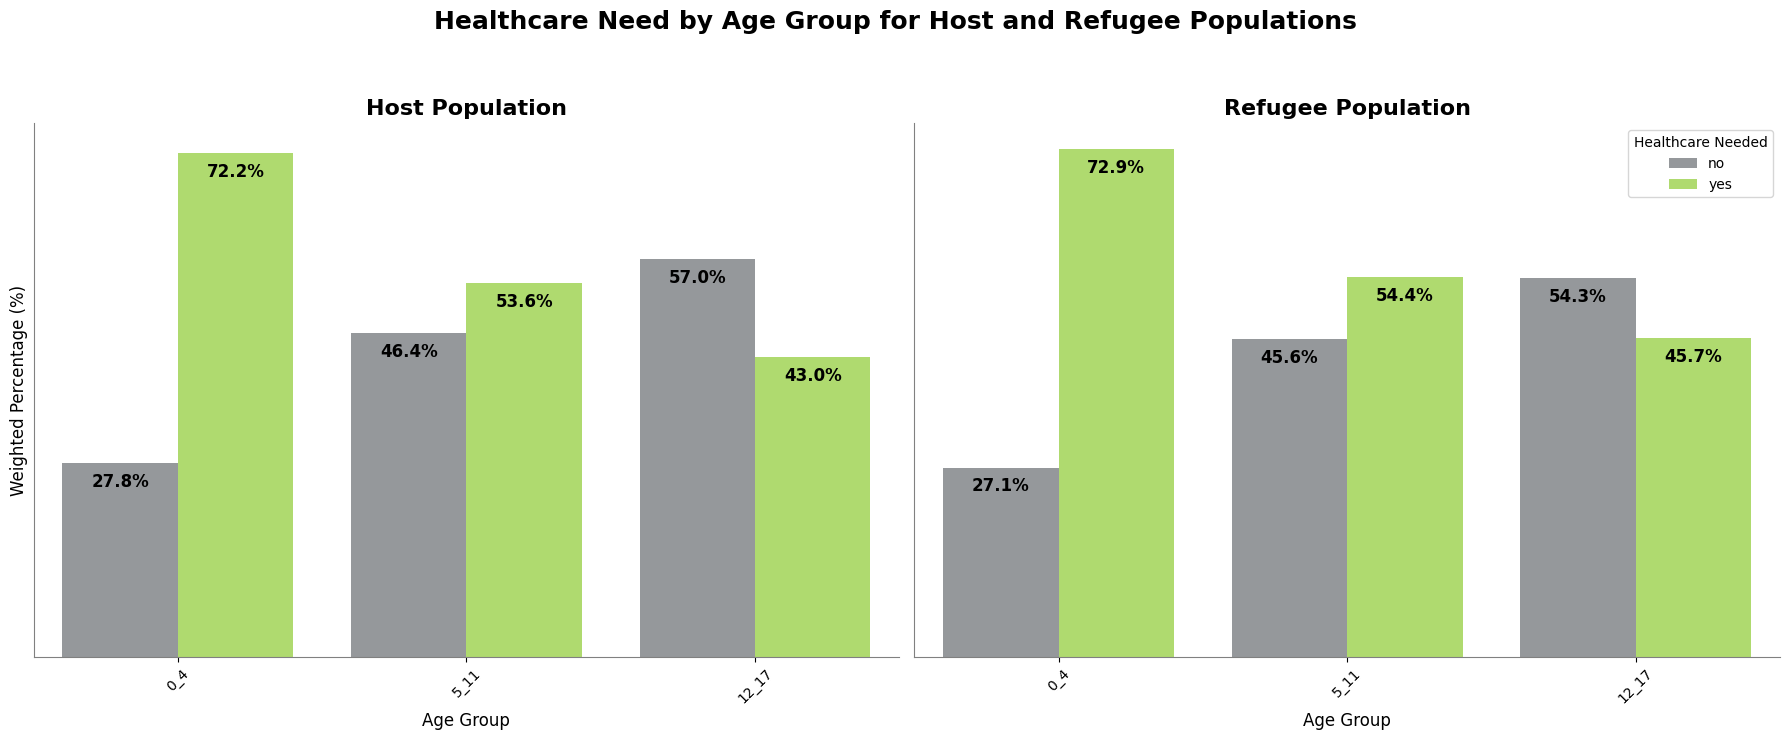

In [36]:
# Use your palette
custom_palette = {'yes': '#B2EC5D', 'no': '#94989c'}

# Rename column for clarity if not already done
combined_df = combined_df.rename(columns={'health_needed_healthcare': 'healthcare_needed'})

# Filter necessary columns
df = combined_df[['group', 'ind_age', 'healthcare_needed', 'weights']].dropna(subset=['healthcare_needed'])

# Function to prepare data
def prepare_healthcare_data(group_name):
    group_df = df[df['group'] == group_name]
    healthcare_age = group_df.groupby(['ind_age', 'healthcare_needed']).apply(
        lambda x: x['weights'].sum()
    ).reset_index(name='weighted_count')

    totals = group_df.groupby('ind_age')['weights'].sum().to_dict()
    healthcare_age['weighted_percent'] = healthcare_age.apply(
        lambda row: (row['weighted_count'] / totals[row['ind_age']]) * 100, axis=1
    )
    return healthcare_age

# Prepare data
host_data = prepare_healthcare_data('Host')
refugee_data = prepare_healthcare_data('Refugee')


# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.suptitle('Healthcare Need by Age Group for Host and Refugee Populations', fontsize=18, weight='bold', color='black', y=1.05)
# Plot Host
sns.barplot(
    data=host_data,
    x='ind_age',
    y='weighted_percent',
    hue='healthcare_needed',
    palette=custom_palette,
    ax=axes[0],
    order=age_order
)

axes[0].set_title('Host Population', fontsize=16, weight='bold', color='black')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Weighted Percentage (%)', fontsize=12)

# Plot Refugee
sns.barplot(
    data=refugee_data,
    x='ind_age',
    y='weighted_percent',
    hue='healthcare_needed',
    palette=custom_palette,
    ax=axes[1],
    order=age_order
)

axes[1].set_title('Refugee Population', fontsize=16, weight='bold', color='black')
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('')  # No duplicate y-label on the second plot

# Clean up both plots
for ax in axes:
    sns.despine(ax=ax)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.tick_params(axis='x', rotation=45, colors='black')
    ax.tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis ticks and labels
    ax.yaxis.label.set_color('black')
    ax.xaxis.label.set_color('black')

    # Add data labels inside the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%',label_type='edge', padding=-20, color='black', fontsize=12, weight='bold')

# Legend
axes[1].legend(title='Healthcare Needed', loc='upper right')
axes[0].legend().set_visible(False)  # Only one legend on the right

plt.tight_layout()
plt.savefig("needing healthcare by age.png")
plt.show()

In [37]:
# Filter dataset for only "yes" and "no"
received_df_filtered = combined_df[combined_df['health_received_healthcare'].isin(['yes', 'no'])]

# Z-score for 95% CI (two-tailed 95%)
z = norm.ppf(0.975)

# Initialize results list
results = []

# Loop through each group
for grp in received_df_filtered['group'].unique():
    grp_df = received_df_filtered[received_df_filtered['group'] == grp]
    total_weight = grp_df['weights'].sum()

    for response in ['yes', 'no']:  # only for "yes" and "no"
        resp_df = grp_df[grp_df['health_received_healthcare'] == response]
        weight_sum = resp_df['weights'].sum()
        p_hat = weight_sum / total_weight
        se = np.sqrt((p_hat * (1 - p_hat)) / total_weight)

        ci_low = (p_hat - z * se) * 100
        ci_high = (p_hat + z * se) * 100

        results.append({
            'group': grp,
            'health_received_healthcare': response,
            'weighted_percentage': round(p_hat * 100, 2),
            '95% CI': f"[{round(ci_low, 2)}%, {round(ci_high, 2)}%]"
        })

# Create a DataFrame from results
received_summary_df = pd.DataFrame(results)

# Reorder columns
received_summary_df = received_summary_df[['group', 'health_received_healthcare', 'weighted_percentage', '95% CI']]

# Display final table
print(received_summary_df)


     group health_received_healthcare  weighted_percentage           95% CI
0     Host                        yes                87.72  [86.04%, 89.4%]
1     Host                         no                12.28  [10.6%, 13.96%]
2  Refugee                        yes                91.44  [90.7%, 92.19%]
3  Refugee                         no                 8.56    [7.81%, 9.3%]


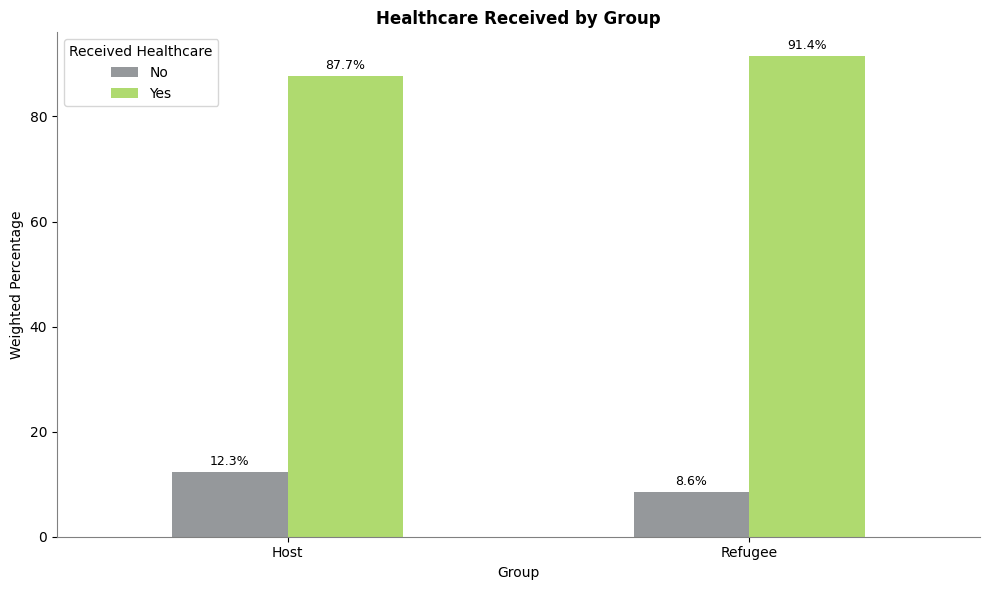

In [38]:
# Step 1: Clean the data
received_df = combined_df[combined_df['health_received_healthcare'].notna()].copy()

# Standardize and clean
received_df['health_received_healthcare'] = (
    received_df['health_received_healthcare']
    .astype(str).str.strip().str.lower()
)

# Keep only valid answers
valid_answers = ['yes', 'no']
received_df = received_df[received_df['health_received_healthcare'].isin(valid_answers)]

# Map for better-looking labels
label_map = {'yes': 'Yes', 'no': 'No'}
received_df['health_received_healthcare'] = received_df['health_received_healthcare'].map(label_map)

# Step 2: Weighted counts
received_summary = received_df.groupby(['group', 'health_received_healthcare']).apply(
    lambda x: x['weights'].sum()
).reset_index(name='weighted_count')

# Step 3: Normalize
received_totals = received_df.groupby('group')['weights'].sum().to_dict()
received_summary['weighted_percent'] = received_summary.apply(
    lambda row: (row['weighted_count'] / received_totals[row['group']]) * 100, axis=1
)
custom_palette = {'Yes': '#B2EC5D', 'No': '#94989c'}
# Step 4: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=received_summary,
    x='group',
    y='weighted_percent',
    palette=custom_palette,
    width=0.5,
    hue='health_received_healthcare'
)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')


plt.title('Healthcare Received by Group',weight='bold')
plt.ylabel('Weighted Percentage')
plt.xlabel('Group')
plt.legend(title='Received Healthcare')
plt.tight_layout()
plt.savefig("received healthcare.png")
plt.show()

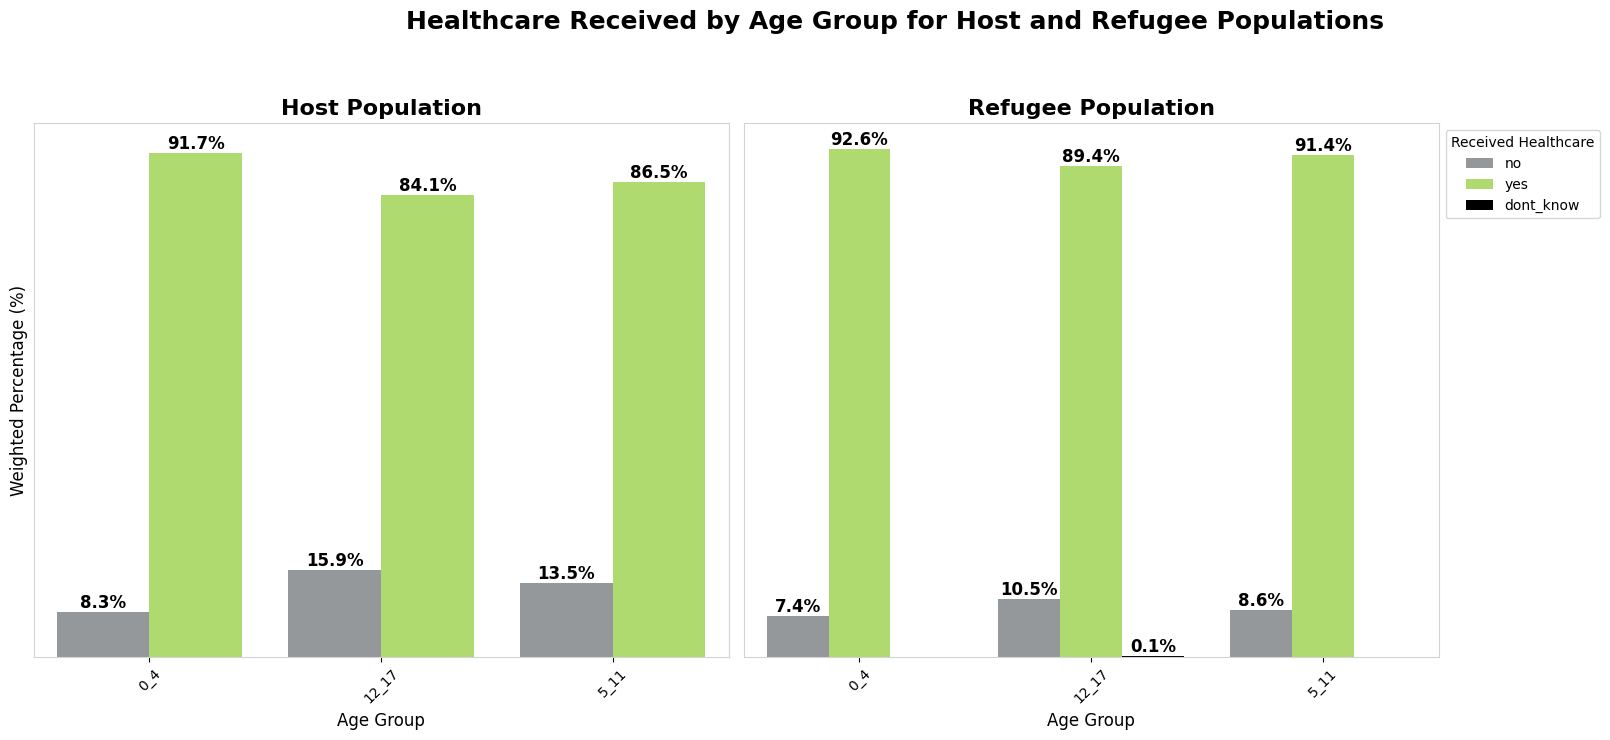

In [39]:
# Custom color palette
custom_palette = {'yes': '#B2EC5D', 'no': '#94989c', 'dont_know': 'black'}

# Rename column for clarity if not already done
combined_df = combined_df.rename(columns={'health_received_healthcare': 'health_received'})

# Filter necessary columns
df = combined_df[['group', 'ind_age', 'health_received', 'weights']].dropna(subset=['health_received'])

# Function to prepare data
def prepare_healthcare_data(group_name):
    group_df = df[df['group'] == group_name]
    healthcare_age = group_df.groupby(['ind_age', 'health_received']).apply(
        lambda x: x['weights'].sum()
    ).reset_index(name='weighted_count')

    totals = group_df.groupby('ind_age')['weights'].sum().to_dict()
    healthcare_age['weighted_percent'] = healthcare_age.apply(
        lambda row: (row['weighted_count'] / totals[row['ind_age']]) * 100, axis=1
    )
    return healthcare_age

# Prepare data for Host and Refugee groups
host_data = prepare_healthcare_data('Host')
refugee_data = prepare_healthcare_data('Refugee')

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.suptitle('Healthcare Received by Age Group for Host and Refugee Populations', fontsize=18, weight='bold', color='black', y=1.05)

# Plot Host
sns.barplot(
    data=host_data,
    x='ind_age',
    y='weighted_percent',
    hue='health_received',
    palette=custom_palette,
    ax=axes[0]
)

axes[0].set_title('Host Population', fontsize=16, weight='bold', color='black')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Weighted Percentage (%)', fontsize=12)

# Plot Refugee
sns.barplot(
    data=refugee_data,
    x='ind_age',
    y='weighted_percent',
    hue='health_received',
    palette=custom_palette,
    ax=axes[1]
)

axes[1].set_title('Refugee Population', fontsize=16, weight='bold', color='black')
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('')  # No duplicate y-label on the second plot

# Clean up both plots
for ax in axes:
    # Set spines (axis lines) to faint grey
    ax.spines['left'].set_color('lightgrey')
    ax.spines['bottom'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.spines['top'].set_color('lightgrey')

    # Set tick marks to black for better visibility
    ax.tick_params(axis='x', rotation=45, colors='black')
    ax.tick_params(axis='y', colors='black')  # Set y-axis ticks to black

    # Remove y-axis ticks and labels for a clean look
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_yticklabels([])  # Remove y-axis labels

    # Keep axis labels black
    ax.yaxis.label.set_color('black')
    ax.xaxis.label.set_color('black')

    # Add data labels inside the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=0, color='black', fontsize=12, weight='bold')

# Adjust the legend position to avoid overlap
axes[1].legend(title='Received Healthcare', loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend().set_visible(False)  # Only one legend on the right

# Adjust the layout to prevent overlap and make space for the legend
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make space on the right for the legend
plt.savefig("received heathcare by group.png")
plt.show()

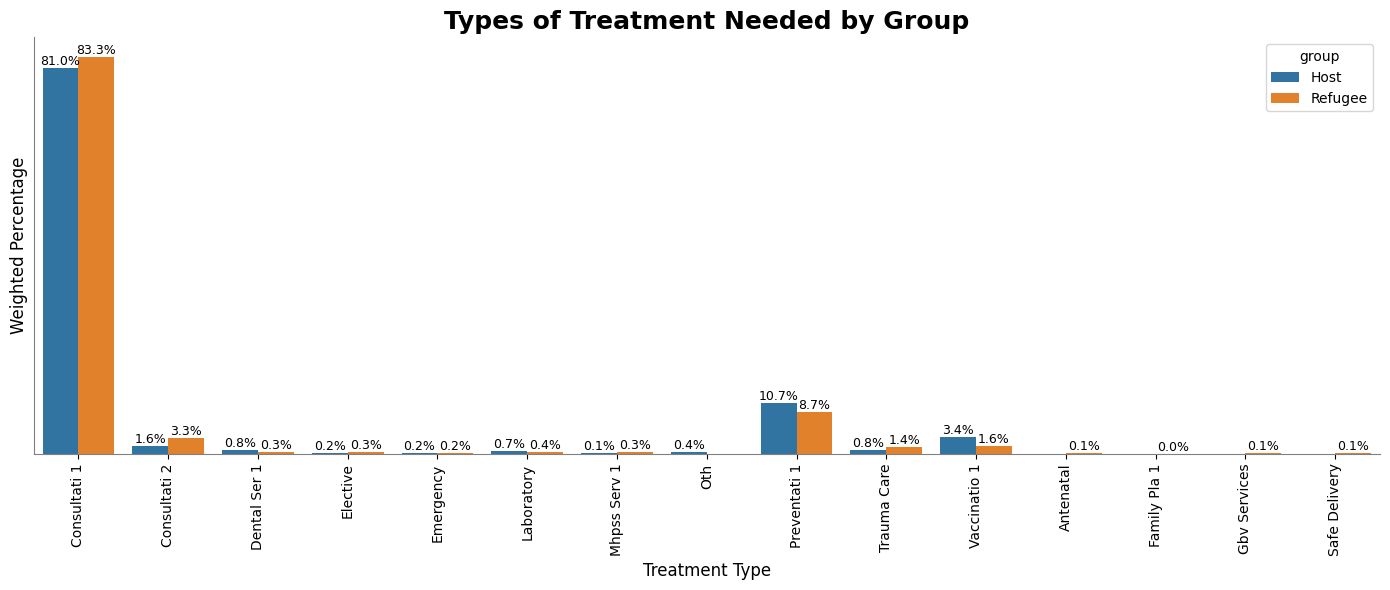

In [40]:
# Select treatment columns
treatment_cols = [col for col in combined_df.columns if col.startswith("health_tmnt_needed_") and
                  "_spec" not in col and "decline" not in col and "dont_know" not in col]

# Reshape to long format
treatment_long = combined_df.melt(id_vars=['group', 'weights'],
                                  value_vars=treatment_cols,
                                  var_name='treatment_type',
                                  value_name='needed')

# Filter to where treatment was needed
treatment_long = treatment_long[treatment_long['needed'] == 1]

# Group and calculate weighted %
treatment_summary = treatment_long.groupby(['group', 'treatment_type']).apply(
    lambda x: x['weights'].sum()
).reset_index(name='weighted_count')

# Normalize by group
group_totals = treatment_long.groupby('group')['weights'].sum().to_dict()
treatment_summary['weighted_percent'] = treatment_summary.apply(
    lambda row: (row['weighted_count'] / group_totals[row['group']]) * 100, axis=1)

# Clean labels
treatment_summary['treatment_type'] = treatment_summary['treatment_type'].str.replace('health_tmnt_needed_', '', regex=False)
treatment_summary['treatment_type'] = treatment_summary['treatment_type'].str.replace('_', ' ').str.title()

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=treatment_summary, x='treatment_type', y='weighted_percent', hue='group')

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in container.datavalues], label_type='edge', padding=0, color='black', fontsize=9)

# Customize title (larger and bold)
plt.title('Types of Treatment Needed by Group', fontsize=18, fontweight='bold')

# Axis customizations
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# Hide y-tick values but keep label
ax.set_yticks([])  # Remove tick marks and numbers
ax.set_ylabel('Weighted Percentage', fontsize=12)
ax.set_xlabel('Treatment Type', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("treatment type.png")
plt.show()

In [41]:
# Select relevant treatment columns
treatment_cols = [col for col in combined_df.columns if col.startswith("health_tmnt_needed_") and
                  "_spec" not in col and "decline" not in col and "dont_know" not in col]

# Reshape to long format
treatment_long = combined_df.melt(
    id_vars=['group', 'weights'],
    value_vars=treatment_cols,
    var_name='treatment_type',
    value_name='needed'
)

# Filter rows where treatment was needed
treatment_long = treatment_long[treatment_long['needed'] == 1]

# Z-score for 95% CI
z = norm.ppf(0.975)

# Initialize result list
results = []

# Loop over each group and treatment type
for grp in treatment_long['group'].unique():
    group_df = treatment_long[treatment_long['group'] == grp]
    total_weight = group_df['weights'].sum()

    for treatment in group_df['treatment_type'].unique():
        treat_df = group_df[group_df['treatment_type'] == treatment]
        treat_weight = treat_df['weights'].sum()
        p_hat = treat_weight / total_weight
        se = np.sqrt((p_hat * (1 - p_hat)) / total_weight)

        ci_low = (p_hat - z * se) * 100
        ci_high = (p_hat + z * se) * 100

        results.append({
            'group': grp,
            'treatment_type': treatment.replace('health_tmnt_needed_', '').replace('_', ' ').title(),
            'weighted_percentage': round(p_hat * 100, 2),
            '95% CI': f"[{round(ci_low, 2)}%, {round(ci_high, 2)}%]"
        })

# Create DataFrame from results
treatment_summary_df = pd.DataFrame(results)

# Reorder columns
treatment_summary_df = treatment_summary_df[['group', 'treatment_type', 'weighted_percentage', '95% CI']]

# Display table
print(treatment_summary_df)


      group treatment_type  weighted_percentage            95% CI
0      Host   Preventati 1                10.69   [9.22%, 12.17%]
1      Host   Consultati 1                81.03  [79.16%, 82.91%]
2      Host   Consultati 2                 1.64    [1.04%, 2.25%]
3      Host    Trauma Care                 0.83    [0.39%, 1.26%]
4      Host       Elective                 0.24    [0.01%, 0.48%]
5      Host      Emergency                 0.21   [-0.01%, 0.42%]
6      Host     Laboratory                 0.67    [0.28%, 1.06%]
7      Host   Mhpss Serv 1                 0.08   [-0.05%, 0.22%]
8      Host   Vaccinatio 1                 3.43     [2.56%, 4.3%]
9      Host   Dental Ser 1                 0.76    [0.34%, 1.17%]
10     Host            Oth                 0.42    [0.11%, 0.72%]
11  Refugee   Preventati 1                 8.66    [7.94%, 9.37%]
12  Refugee   Consultati 1                83.25  [82.31%, 84.19%]
13  Refugee   Consultati 2                 3.32    [2.87%, 3.77%]
14  Refuge

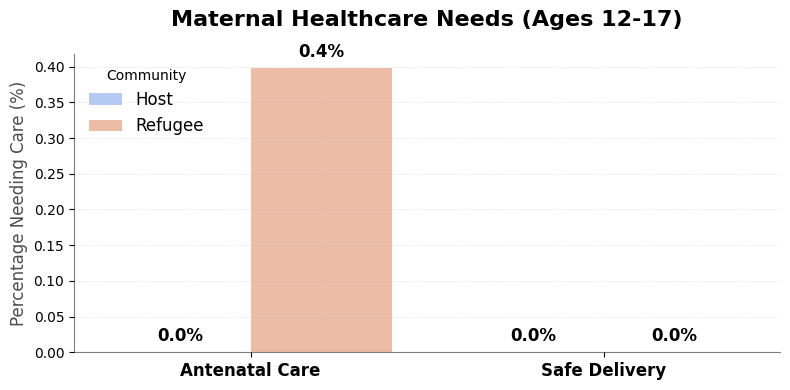

In [42]:
if 'health_tmnt_needed_antenatal' in combined_df.columns:
    # Prepare maternal health data
    maternal_df = combined_df[['ind_age', 'group', 'weights', 'health_tmnt_needed_antenatal',
                             'health_tmnt_needed_safe_delivery']].copy()

    # Filter for women of reproductive age (12-17 years) and ensure no missing data
    maternal_df = maternal_df[(maternal_df['ind_age'] == '12_17') &  # Focus on women of reproductive age
                             (maternal_df['health_tmnt_needed_antenatal'].notna())]

    # Calculate rates
    maternal_rates = maternal_df.groupby('group').apply(
        lambda x: pd.Series({
            'Antenatal Need': (x['weights'] * (x['health_tmnt_needed_antenatal'] == 1)).sum() / x['weights'].sum() * 100,
            'Delivery Care Need': (x['weights'] * (x['health_tmnt_needed_safe_delivery'] == 1)).sum() / x['weights'].sum() * 100
        })
    ).reset_index()

    # Melt for plotting
    maternal_melted = maternal_rates.melt(id_vars='group', value_vars=['Antenatal Need', 'Delivery Care Need'],
                                          var_name='Care Type', value_name='Percentage')

    # Color palette with more diversity
    color_palette = sns.color_palette("coolwarm", n_colors=2)

    # Plot
    plt.figure(figsize=(8,4))
    ax = sns.barplot(
        x='Care Type', y='Percentage', hue='group',
        data=maternal_melted,
        palette=color_palette
    )

    # Add data labels with a more stylish format
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=5, fontsize=12, fontweight='bold', color='black')

    # Enhance plot style
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_alpha(0.5)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

    # More polished title and labels
    plt.title('Maternal Healthcare Needs (Ages 12-17)', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Percentage Needing Care (%)', fontsize=12, alpha=0.7)
    plt.xlabel('')
    plt.xticks([0, 1], ['Antenatal Care', 'Safe Delivery'], fontsize=12, fontweight='bold')
    plt.legend(title='Community', frameon=False, fontsize=12, loc='upper left')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

else:
    print("Maternal health columns not found in dataset")


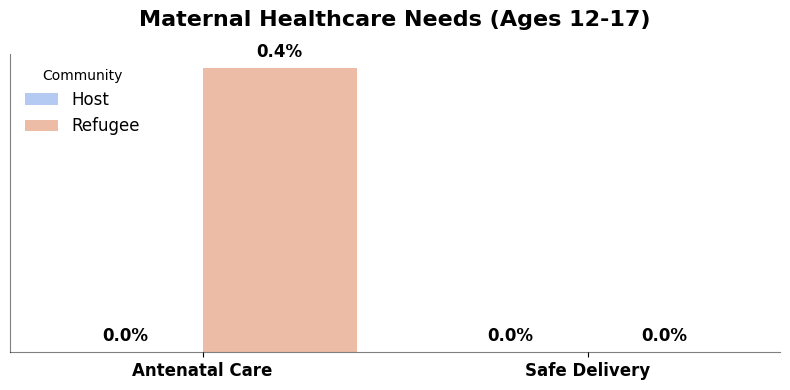

In [43]:
if 'health_tmnt_needed_antenatal' in combined_df.columns:
    # Prepare maternal health data
    maternal_df = combined_df[['ind_age', 'group', 'weights', 'health_tmnt_needed_antenatal',
                               'health_tmnt_needed_safe_delivery']].copy()

    # Filter for women of reproductive age (12-17 years) and ensure no missing data
    maternal_df = maternal_df[
        (maternal_df['ind_age'] == '12_17') &
        (maternal_df['health_tmnt_needed_antenatal'].notna())
    ]

    # Calculate rates
    maternal_rates = maternal_df.groupby('group').apply(
        lambda x: pd.Series({
            'Antenatal Need': (x['weights'] * (x['health_tmnt_needed_antenatal'] == 1)).sum() / x['weights'].sum() * 100,
            'Delivery Care Need': (x['weights'] * (x['health_tmnt_needed_safe_delivery'] == 1)).sum() / x['weights'].sum() * 100
        })
    ).reset_index()

    # Melt for plotting
    maternal_melted = maternal_rates.melt(
        id_vars='group',
        value_vars=['Antenatal Need', 'Delivery Care Need'],
        var_name='Care Type',
        value_name='Percentage'
    )

    # Color palette
    color_palette = sns.color_palette("coolwarm", n_colors=2)

    # Plot
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(
        x='Care Type', y='Percentage', hue='group',
        data=maternal_melted,
        palette=color_palette
    )

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=5, fontsize=12, fontweight='bold', color='black')

    # Remove y-axis gridlines and ticks
    ax.grid(False)
    ax.set_yticks([])

    # Enhance plot style
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_alpha(0.5)

    # More polished title and labels
    plt.title('Maternal Healthcare Needs (Ages 12-17)', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([0, 1], ['Antenatal Care', 'Safe Delivery'], fontsize=12, fontweight='bold')
    plt.legend(title='Community', frameon=False, fontsize=12, loc='upper left')

    # Adjust layout
    plt.tight_layout()
    plt.savefig("maternal healthcare.png")
    plt.show()

else:
    print("Maternal health columns not found in dataset")


In [44]:
import numpy as np
import pandas as pd

# List of services
services = [
    'health_tmnt_needed_preventati_1', 'health_tmnt_needed_consultati_1', 'health_tmnt_needed_trauma_care',
    'health_tmnt_needed_emergency', 'health_tmnt_needed_antenatal', 'health_tmnt_needed_safe_delivery',
    'health_tmnt_needed_laboratory', 'health_tmnt_needed_gbv_services', 'health_tmnt_needed_mhpss_serv_1',
    'health_tmnt_needed_vaccinatio_1', 'health_tmnt_needed_dental_ser_1', 'health_tmnt_needed_family_pla_1',
    'health_tmnt_needed_oth'
]

# Friendly labels
service_labels = {
    'health_tmnt_needed_preventati_1': 'Preventative Treatment',
    'health_tmnt_needed_consultati_1': 'Consultation Services',
    'health_tmnt_needed_trauma_care': 'Trauma Care',
    'health_tmnt_needed_emergency': 'Emergency Treatment',
    'health_tmnt_needed_antenatal': 'Antenatal Care',
    'health_tmnt_needed_safe_delivery': 'Safe Delivery',
    'health_tmnt_needed_laboratory': 'Laboratory Services',
    'health_tmnt_needed_gbv_services': 'GBV Services',
    'health_tmnt_needed_mhpss_serv_1': 'Mental Health & Psychosocial Support',
    'health_tmnt_needed_vaccinatio_1': 'Vaccination Services',
    'health_tmnt_needed_dental_ser_1': 'Dental Services',
    'health_tmnt_needed_family_pla_1': 'Family Planning',
    'health_tmnt_needed_oth': 'Other Services'
}

# Z-score for 95% confidence interval
Z = 1.96

# List to collect results
all_rows = []

# Calculate
for col in services:
    temp = combined_df[combined_df[col] == 1].groupby('group')['weights'].sum().reset_index()
    temp['service'] = service_labels[col]
    total = combined_df.groupby('group')['weights'].sum().reset_index().rename(columns={'weights': 'total'})
    temp = temp.merge(total, on='group')
    temp['percentage'] = 100 * temp['weights'] / temp['total']

    p = temp['percentage'] / 100
    n = temp['total']
    se = np.sqrt(p * (1 - p) / n)
    moe = Z * se * 100

    lower = (temp['percentage'] - moe).clip(lower=0)
    upper = (temp['percentage'] + moe).clip(upper=100)
    temp['confidence_interval'] = lower.round(1).astype(str) + '% - ' + upper.round(1).astype(str) + '%'

    temp = temp[['group', 'service', 'percentage', 'confidence_interval']]
    all_rows.append(temp)

# Final DataFrame
service_df = pd.concat(all_rows, ignore_index=True)

service_df


,group,service,percentage,confidence_interval
0,Host,Preventative Treatment,6.749980,5.8% - 7.7%
1,Refugee,Preventative Treatment,5.494111,5.0% - 6.0%
2,Host,Consultation Services,51.147504,49.2% - 53.0%
3,Refugee,Consultation Services,52.843540,51.8% - 53.8%
4,Host,Trauma Care,0.521123,0.2% - 0.8%
5,Refugee,Trauma Care,0.877183,0.7% - 1.1%
6,Host,Emergency Treatment,0.129413,0.0% - 0.3%
7,Refugee,Emergency Treatment,0.096734,0.0% - 0.2%
8,Refugee,Antenatal Care,0.081364,0.0% - 0.1%
9,Refugee,Safe Delivery,0.055637,0.0% - 0.1%


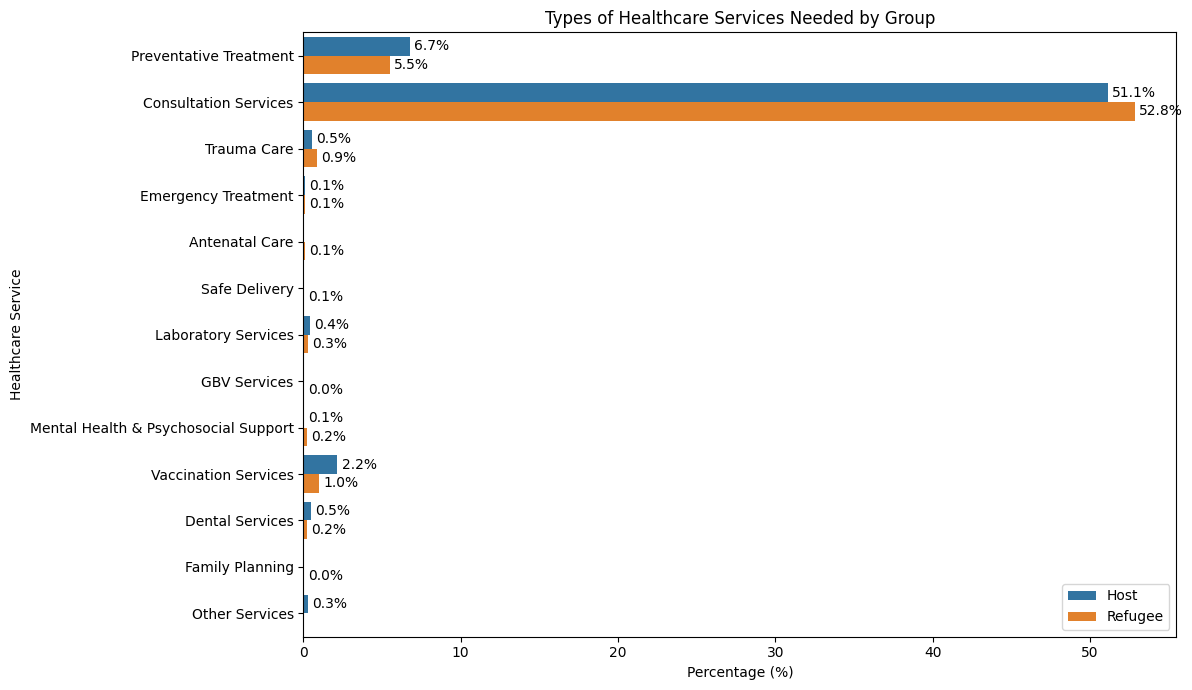

In [45]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=service_df, x='percentage', y='service', hue='group')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%.1f%%')

plt.title("Types of Healthcare Services Needed by Group")
plt.xlabel("Percentage (%)")
plt.ylabel("Healthcare Service")

# Move legend inside, lower right
ax.legend(loc='lower right', frameon=True)

plt.tight_layout()
plt.savefig("healthcare services.png")
plt.show()

### Healthcare Access and Service Utilization Insights

**High Healthcare Needs Across Both Communities**  
The need for healthcare services is high among both **host** and **refugee** communities. Slightly more refugee children (57.5%) reported needing healthcare compared to host children (55.1%), showing that refugee children may face slightly greater health challenges.

- The 0–4 age group has the highest healthcare needs for both host and refugee populations, with 72.2% of host children and 72.9% of refugee children needing care.
- In the 5–11 age group, healthcare needs remain high, with around 53–54% needing care across both populations.
- For children aged 12–17 years, the need for healthcare drops slightly but remains significant(43% for host and 45.7% for refugees)
  
Despite this higher need, refugee children were more likely to get the care they needed. About 91.4% of refugee children who needed healthcare received it, compared to 87.7% of host children.

This indicates strong healthcare accessibility for both groups, with slightly higher service coverage among refugees, suggesting that the service delivery mechanisms operating within refugee camps and settlements are functioning relatively effectively to ensure that a high proportion of children in need are able to access medical attention.

**Dominance of Consultation Services**  
For both host and refugee children, the majority of healthcare visits were for Consultation services:  
- **51.1%** of host and **52.8%** of refugee healthcare services were consultations.
**preventive treatments and vaccinations**
**host** children accessed more preventive treatments and vaccinations:
- Preventive services: 6.7% (host) vs. 5.5% (refugee)
- Vaccination services: 2.2% (host) vs. 1.0% (refugee)

**Specialized Services Are Rare**  
Access to specialized or critical services (e.g., trauma care, emergency services, mental health support) was minimal for both groups:  
- Trauma care and emergency services each accounted for **less than 1%** of cases.
- Mental Health & Psychosocial Support (MHPSS) services were accessed by only **0.05%** of hosts and **0.2%** of refugees.
- Vaccination services were accessed by **2.2%** of hosts and **1.0%** of refugees.  

### Recommendations

**1. Strengthen Preventive Healthcare Outreach**  
Boost community-level health education, routine checkups, and vaccination campaigns to shift from reactive to preventive healthcare—especially among both refugee and host children.

**2. Expand Access to Specialized Services**  
Invest in trauma care, emergency response readiness, mental health services (MHPSS), and GBV support.  
Special focus should be placed on making these services visible, accessible, and culturally sensitive.

**3. Improve Health Service Integration in Host Communities**  
While refugee children are slightly more likely to access healthcare when needed, efforts should ensure host community systems are equally supported—particularly in secondary and preventive care capacity.

**4. Address Low Access to Mental Health Services**  
Given the vulnerabilities faced by both displaced and host children, **scaling up MHPSS services** (especially school-based and community-based models) is critical.


# CONCLUSION
Our comparative analysis of displaced (refugee) and host community children in Bangladesh has revealed significant disparities and shared challenges. The findings emphasize the need for inclusive, integrated solutions, particularly in education.


Refugee children, despite higher needs, are more likely to receive healthcare, highlighting the effectiveness of refugee support systems. However, gaps remain in formal schooling access and specialized healthcare service



Refugee adolescents face considerable obstacles to staying enrolled in school. It is clear that focused efforts are needed to ensure equal opportunities in education, healthcare, and safety for all children, with a focus on long-term solutions for integrion.



Our recommendations—ranging from integrating refugee children into formal education systems to expanding healthcare services—are designed to foster actionable change. By applying these insights, we can inform policies that promote inclusion, equality, and well-being for all children, regardless of the status.



In the end, the future of both displaced and host community children depends on our ability to transform data into meaningful action, ensuring every child has the opportunity to thrive.